# ÿ™ÿ≠ŸÖŸäŸÑ ÿßŸÑŸÖŸÉÿßÿ™ÿ®



---



In [ ]:
import gdown
import pandas as pd
import requests
import os
import gzip
import shutil
import time
import kagglehub
from google.colab import drive
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




---


# ÿ™ÿ≠ŸÖŸäŸÑ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™



---



 ŸáÿØŸàŸÑ ÿ®ÿ≥ ŸÑÿßŸÑŸÜÿß , ÿßÿ≠ÿ∞ŸÅŸäŸàŸÜ ÿ®ÿπÿØŸäŸÜ


In [59]:
# the full final data for quick use
file_id = "1e5MujyboHR0xp3KV4ZWJXPdk_rSp1r7L"  # original one from leen
# https://drive.google.com/file/d//view?usp=sharing
# file_id='1e5MujyboHR0xp3KV4ZWJXPdk_rSp1r7L' # after running this notebook

output_file = "downloaded_file.csv"  # You can change the output file name

gdown.download(id=file_id, output=output_file, quiet=False)
leen_movies_df = pd.read_csv(output_file)
print(f"File downloaded to {output_file}")
leen_movies_df.head()

Downloading...
From: https://drive.google.com/uc?id=1e5MujyboHR0xp3KV4ZWJXPdk_rSp1r7L
To: /content/downloaded_file.csv
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 32.0M/32.0M [00:00<00:00, 176MB/s]


File downloaded to downloaded_file.csv


id                             title                            genres  \
0  615656                 Meg 2: The Trench     Action-Science Fiction-Horror   
1  758323               The Pope's Exorcist           Horror-Mystery-Thriller   
2  533535              Deadpool & Wolverine     Action-Comedy-Science Fiction   
3  667538  Transformers: Rise of the Beasts  Action-Adventure-Science Fiction   
4  693134                    Dune: Part Two         Science Fiction-Adventure   

  original_language                                           overview  \
0                en  An exploratory dive into the deepest depths of...   
1                en  Father Gabriele Amorth Chief Exorcist of the V...   
2                en  A listless Wade Wilson toils away in civilian ...   
3                en  When a new threat capable of destroying the en...   
4                en  Follow the mythic journey of Paul Atreides as ...   

   popularity                               production_companies release_date  \
0    8763.998  Apelles Entertainment-Warner Bros. Pictures-di...   2023-08-02   
1    5953.227  Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...   2023-04-05   
2    5410.496  Marvel Studios-Maximum Effort-21 Laps Entertai...   2024-07-24   
3    5409.104  Skydance-Paramount-di Bonaventura Pictures-Bay...   2023-06-06   
4    4742.163                                 Legendary Pictures   2024-02-27   

        budget       revenue  ...  \
0  129000000.0  3.520565e+08  ...   
1   18000000.0  6.567582e+07  ...   
2  200000000.0  1.326387e+09  ...   
3  200000000.0  4.070455e+08  ...   
4  190000000.0  6.838137e+08  ...   

                                             credits tagline_sentiment  \
0  Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...                 0   
1  Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...                 1   
2  Ryan Reynolds-Hugh Jackman-Emma Corrin-Matthew...                 0   
3  Anthony Ramos-Dominique Fishback-Luna Lauren V...                 0   
4  Timoth√©e Chalamet-Zendaya-Rebecca Ferguson-Jav...                -1   

         profit  release_year  release_month release_day  unique_actors_count  \
0  2.230565e+08          2023              8           2                   27   
1  4.767582e+07          2023              4           5                   30   
2  1.126387e+09          2024              7          24                   57   
3  2.070455e+08          2023              6           6                   38   
4  4.938137e+08          2024              2          27                  105   

   actors_avg_rating  actors_bayesian_rating  actors_penalty_rating  
0               5.48                    5.74                   3.27  
1               5.74                    5.83                   2.97  
2               6.08                    6.03                   3.46  
3               6.05                    5.93                   3.30  
4               5.88                    5.90                   2.67  

[5 rows x 25 columns]

In [50]:
# the actors data after running this notebook
# https://drive.google.com/file/d/1q1G66gPJIDNZPydPNwlC3XEsE8yUz917/view?usp=sharing
file_id='1q1G66gPJIDNZPydPNwlC3XEsE8yUz917' # after running this notebook

output_file = "actors_rating_df.csv"  # You can change the output file name

gdown.download(id=file_id, output=output_file, quiet=False)
actors_rating_hanna_df = pd.read_csv(output_file)
print(f"File downloaded to {output_file}")
actors_rating_hanna_df.head()

Downloading...
From: https://drive.google.com/uc?id=1q1G66gPJIDNZPydPNwlC3XEsE8yUz917
To: /content/actors_rating_df.csv
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 27.2M/27.2M [00:00<00:00, 153MB/s] 


File downloaded to actors_rating_df.csv


actor  num_movies  average_rating  bayesian_avg_rating  \
0               $2 Tony           1            5.40                 5.78   
1              'Ana Ika           1            5.30                 5.77   
2    'Angry' Joe Cleary           1            9.00                 6.38   
3        'Anissa LaShay           1            6.60                 5.98   
4  'Baby' Carmen De Rue           6            5.42                 5.62   

   penalty_avg_rating               top_movie_name  top_movie_rating  
0                1.35        Spacebong Beach Babes               5.4  
1                1.32        It Only Takes a Night               5.3  
2                2.25                A Joyce Story               9.0  
3                1.65  Two's A Couple, 3's A Crowd               6.6  
4                1.35               Going Straight               5.9

In [ ]:
# hanna and leen combined
# https://drive.google.com/file/d//view?usp=drive_link
output_file = "downloaded_file.csv"  # You can change the output file name
file_id = "1RDf4Q24UDsKg6suppFdteqj5WY_Qljqi"
gdown.download(id=file_id, output=output_file, quiet=False)
leen_han_movies_df = pd.read_csv(output_file)
print(f"File downloaded to {output_file}")
leen_han_movies_df.head()

Downloading...
From: https://drive.google.com/uc?id=1RDf4Q24UDsKg6suppFdteqj5WY_Qljqi
To: /content/downloaded_file.csv
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2.84M/2.84M [00:00<00:00, 177MB/s]

File downloaded to downloaded_file.csv


tconst titleType                      primaryTitle  \
0  tt0003854     movie                  Dodge City Trail   
1  tt0004027     movie               A Good Little Devil   
2  tt0004099     movie  His Majesty, the Scarecrow of Oz   
3  tt0004707     movie        Tillie's Punctured Romance   
4  tt0004942     movie           The Battle Cry of Peace   

                      originalTitle  startYear  runtimeMinutes  \
0                  Dodge City Trail       1936              56   
1               A Good Little Devil       1914              50   
2  His Majesty, the Scarecrow of Oz       1914              59   
3        Tillie's Punctured Romance       1914              82   
4           The Battle Cry of Peace       1915              90   

                    genres runtimeCategory  averageRating  movie_age  \
0      Drama,Music,Western           short            4.0         89   
1                    Drama           short            6.2        111   
2  Adventure,Comedy,Family           short            5.3        111   
3                   Comedy        standard            6.2        111   
4                    Drama        standard            4.3        110   

  rating_category   age_group  
0            Poor  51‚Äì100 yrs  
1         Average    100+ yrs  
2         Average    100+ yrs  
3         Average    100+ yrs  
4            Poor    100+ yrs

In [ ]:

file_id = "1FbTri_OGjhNy8RdzH3Q2r3iQvQRc79TU"  # Replace with your actual file ID
output_file = "movies.csv"  # You can change the output file name

gdown.download(id=file_id, output=output_file, quiet=False)
leen_movies_df = pd.read_csv(output_file)
print(f"File downloaded to {output_file}")
leen_movies_df.head()

Downloading...
From: https://drive.google.com/uc?id=1FbTri_OGjhNy8RdzH3Q2r3iQvQRc79TU
To: /content/movies.csv
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 31.5M/31.5M [00:00<00:00, 90.8MB/s]


File downloaded to movies.csv


id                             title                            genres  \
0  615656                 Meg 2: The Trench     Action-Science Fiction-Horror   
1  758323               The Pope's Exorcist           Horror-Mystery-Thriller   
2  533535              Deadpool & Wolverine     Action-Comedy-Science Fiction   
3  667538  Transformers: Rise of the Beasts  Action-Adventure-Science Fiction   
4  693134                    Dune: Part Two         Science Fiction-Adventure   

  original_language                                           overview  \
0                en  An exploratory dive into the deepest depths of...   
1                en  Father Gabriele Amorth Chief Exorcist of the V...   
2                en  A listless Wade Wilson toils away in civilian ...   
3                en  When a new threat capable of destroying the en...   
4                en  Follow the mythic journey of Paul Atreides as ...   

   popularity                               production_companies release_date  \
0    8763.998  Apelles Entertainment-Warner Bros. Pictures-di...   2023-08-02   
1    5953.227  Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...   2023-04-05   
2    5410.496  Marvel Studios-Maximum Effort-21 Laps Entertai...   2024-07-24   
3    5409.104  Skydance-Paramount-di Bonaventura Pictures-Bay...   2023-06-06   
4    4742.163                                 Legendary Pictures   2024-02-27   

        budget       revenue  ...  \
0  129000000.0  3.520565e+08  ...   
1   18000000.0  6.567582e+07  ...   
2  200000000.0  1.326387e+09  ...   
3  200000000.0  4.070455e+08  ...   
4  190000000.0  6.838137e+08  ...   

                                             tagline vote_average vote_count  \
0                                  Back for seconds.        7.079     1365.0   
1  Inspired by the actual files of Father Gabriel...        7.433      545.0   
2                                     Come together.        7.765     3749.0   
3                                     Unite or fall.        7.340     1007.0   
4                            Long live the fighters.        8.300     2770.0   

                                             credits  tagline_sentiment  \
0  Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...                  0   
1  Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...                  1   
2  Ryan Reynolds-Hugh Jackman-Emma Corrin-Matthew...                  0   
3  Anthony Ramos-Dominique Fishback-Luna Lauren V...                  0   
4  Timoth√©e Chalamet-Zendaya-Rebecca Ferguson-Jav...                 -1   

         profit  release_year  release_month  release_day  unique_actors_count  
0  2.230565e+08          2023              8            2                   27  
1  4.767582e+07          2023              4            5                   30  
2  1.126387e+09          2024              7           24                   57  
3  2.070455e+08          2023              6            6                   38  
4  4.938137e+08          2024              2           27                  105  

[5 rows x 22 columns]

In [51]:
# hanna 1
# https://drive.google.com/file/d/1L4qadvT7gvCuDZEynve072_f98lD3oPK/view?usp=drive_link
file_id = "1L4qadvT7gvCuDZEynve072_f98lD3oPK"  # Replace with your actual file ID
output_file = "hanna1.csv"  # You can change the output file name

gdown.download(id=file_id, output=output_file, quiet=False)
hanna1_df = pd.read_csv(output_file)
print(f"File downloaded to {output_file}")
hanna1_df.head()

Downloading...
From: https://drive.google.com/uc?id=1L4qadvT7gvCuDZEynve072_f98lD3oPK
To: /content/hanna1.csv
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16.0M/16.0M [00:00<00:00, 154MB/s]


File downloaded to hanna1.csv


tconst titleType                    primaryTitle  \
0  tt0000009     movie                      Miss Jerry   
1  tt0000502     movie                        Bohemios   
2  tt0000679     movie  The Fairylogue and Radio-Plays   
3  tt0001498     movie         The Battle of Trafalgar   
4  tt0001812     movie                     Oedipus Rex   

                    originalTitle  startYear  runtimeMinutes  \
0                      Miss Jerry       1894              45   
1                        Bohemios       1905             100   
2  The Fairylogue and Radio-Plays       1908             120   
3         The Battle of Trafalgar       1911              51   
4                     Oedipus Rex       1911              56   

              genres runtimeCategory  averageRating  movie_age  \
0            Romance           short            5.4        131   
1            Unknown        standard            3.6        120   
2  Adventure,Fantasy        standard            5.1        117   
3                War           short            8.1        114   
4              Drama           short            5.5        114   

  rating_category age_group  
0         Average  100+ yrs  
1            Poor  100+ yrs  
2         Average  100+ yrs  
3       Excellent  100+ yrs  
4         Average  100+ yrs

In [ ]:
hanna1_df.columns

Index(['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'startYear',
       'runtimeMinutes', 'genres', 'runtimeCategory', 'averageRating',
       'movie_age', 'rating_category', 'age_group'],
      dtype='object')

In [52]:
# actors names
# https://drive.google.com/file/d//view?usp=sharing
file_id = "1TGtz238BmEkmjbXabdJhAR9LDc6FpeqR"  # Replace with your actual file ID
output_file = "actors_names.csv"  # You can change the output file name

gdown.download(id=file_id, output=output_file, quiet=False)
actors_names_df = pd.read_csv(output_file)
print(f"File downloaded to {output_file}")
actors_names_df.head()

Downloading...
From: https://drive.google.com/uc?id=1TGtz238BmEkmjbXabdJhAR9LDc6FpeqR
To: /content/actors_names.csv
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 47.3M/47.3M [00:00<00:00, 233MB/s]


File downloaded to actors_names.csv


actor  rating       movie
0    Blanche Bayliss     5.4  Miss Jerry
1  William Courtenay     5.4  Miss Jerry
2     Chauncey Depew     5.4  Miss Jerry
3   Antonio del Pozo     3.6    Bohemios
4        El Mochuelo     3.6    Bohemios

In [ ]:
actors_names_df.columns

Index(['actor', 'rating', 'movie'], dtype='object')


### ÿ®ŸäÿßŸÜÿßÿ™ ÿßŸÑÿßŸÅŸÑÿßŸÖ Ÿà ÿßŸÑŸÖŸÖÿ´ŸÑŸäŸÜ ŸÖŸÜ imdb



In [53]:

# List of IMDb dataset URLs
imdb_urls = [
    "https://datasets.imdbws.com/title.basics.tsv.gz",
    "https://datasets.imdbws.com/title.ratings.tsv.gz",
    "https://datasets.imdbws.com/title.principals.tsv.gz",
    "https://datasets.imdbws.com/name.basics.tsv.gz"
]

output_dir = "imdb/"

# Create the directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Created directory: {output_dir}")

for url in imdb_urls:
    # Extract filename from URL (e.g., "name.basics.tsv.gz")
    filename_gz = url.split('/')[-1]
    filename_tsv = filename_gz.replace('.gz', '')

    output_file_gz = os.path.join(output_dir, filename_gz)
    output_file_tsv = os.path.join(output_dir, filename_tsv)

    # Check if the decompressed TSV file already exists
    if os.path.exists(output_file_tsv):
        print(f"Skipping {filename_tsv}: Already exists in {output_dir}")
        continue # Skip to the next URL

    # Download the file
    print(f"\nDownloading {url} to {output_file_gz}...")
    try:
        response = requests.get(url, stream=True)
        response.raise_for_status() # Raise an HTTPError for bad responses (4xx or 5xx)

        with open(output_file_gz, 'wb') as f:
            for chunk in response.iter_content(chunk_size=8192):
                f.write(chunk)
        print("Download complete. Decompressing...")

        # Decompress the .gz file
        with gzip.open(output_file_gz, 'rb') as f_in:
            with open(output_file_tsv, 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)
        print(f"Decompression complete. File saved to {output_file_tsv}")

        # Optional: Remove the .gz file after successful decompression to save space
        os.remove(output_file_gz)
        print(f"Removed compressed file: {output_file_gz}")

        # Add a small delay between downloads to be polite to the server
        time.sleep(1)

    except requests.exceptions.RequestException as e:
        print(f"Error downloading {url}: {e}")
    except Exception as e:
        print(f"An unexpected error occurred with {url}: {e}")

print("\nAll specified IMDb datasets have been processed.")
print(f"You can find them in the '{output_dir}' directory.")


Created directory: imdb/

Download complete. Decompressing...
Decompression complete. File saved to imdb/title.basics.tsv
Removed compressed file: imdb/title.basics.tsv.gz

Download complete. Decompressing...
Decompression complete. File saved to imdb/title.ratings.tsv
Removed compressed file: imdb/title.ratings.tsv.gz

Download complete. Decompressing...
Decompression complete. File saved to imdb/title.principals.tsv
Removed compressed file: imdb/title.principals.tsv.gz

Download complete. Decompressing...
Decompression complete. File saved to imdb/name.basics.tsv
Removed compressed file: imdb/name.basics.tsv.gz

All specified IMDb datasets have been processed.
You can find them in the 'imdb/' directory.


In [ ]:
basics_df = pd.read_csv('imdb/title.basics.tsv', sep='\t', low_memory=False)
ratings_df = pd.read_csv('imdb/title.ratings.tsv', sep='\t')
basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11749834 entries, 0 to 11749833
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         object
 5   startYear       object
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: object(9)
memory usage: 806.8+ MB


In [55]:
# extra for the actors
principals_df = pd.read_csv('imdb/title.principals.tsv', sep='\t')
names_df = pd.read_csv('imdb/name.basics.tsv', sep='\t', low_memory=False)


In [56]:
import pandas as pd
import os

# Define the directory where your TSV files are stored
output_dir = "imdb/"



print("Loading IMDb datasets...")

try:


    # --- Step 1: Filter to movies and merge with ratings ---
    movies_df = basics_df[basics_df['titleType'] == 'movie'].copy()
    print(f"Filtered to movies only. Shape: {movies_df.shape}")

    movie_ratings_df = pd.merge(movies_df, ratings_df, on='tconst', how='left')
    movie_ratings_df = movie_ratings_df.rename(columns={
        'primaryTitle': 'movie_title',
        'startYear': 'release_year',
        'runtimeMinutes': 'runtime_minutes',
        'averageRating': 'avg_rating',
        'numVotes': 'num_votes'
    })
    print(f"Merged movies with ratings. Shape: {movie_ratings_df.shape}")


    # --- Step 2: Prepare actor information ---

    # Filter principals to include only actors/actresses
    actors_in_principals_df = principals_df[
        (principals_df['category'] == 'actor') |
        (principals_df['category'] == 'actress')
    ].copy()
    print(f"Filtered principals to actors/actresses only. Shape: {actors_in_principals_df.shape}")

    # Merge actor principals with name.basics to get actor names
    # Select only necessary columns to keep the dataframe small
    actor_names_map_df = pd.merge(
        actors_in_principals_df[['tconst', 'nconst', 'characters']],
        names_df[['nconst', 'primaryName']],
        on='nconst',
        how='left'
    )
    actor_names_map_df = actor_names_map_df.rename(columns={'primaryName': 'actor_name'})
    print(f"Merged actor principals with names. Shape: {actor_names_map_df.shape}")


    # --- Step 3: Aggregate actors for each movie ---

    # Handle potential NaN values in 'actor_name' or 'characters' before combining
    # Fill NaN values with empty string or a placeholder if needed
    actor_names_map_df['actor_name'] = actor_names_map_df['actor_name'].fillna('')
    # Replace '\N' with NaN, then fill NaN with empty string
    actor_names_map_df['characters'] = actor_names_map_df['characters'].replace('\\N', pd.NA).fillna('')


    actor_names_map_df['actor_info'] = actor_names_map_df.apply(
        lambda row: f"{row['actor_name']} ({row['characters']})" if row['characters'] else row['actor_name'],
        axis=1
    )

    # Filter out empty 'actor_info' strings that might result from missing names
    actor_names_map_df = actor_names_map_df[actor_names_map_df['actor_info'] != ''].copy()

    # Aggregate all actor_info strings for each movie into a single string, separated by ", "
    # **Crucial Change:** Use map(str, x) to ensure all elements are strings before joining
    movie_actors_aggregated = actor_names_map_df.groupby('tconst')['actor_info'].apply(
        lambda x: ', '.join(map(str, x.drop_duplicates()))
    ).reset_index()

    movie_actors_aggregated.rename(columns={'actor_info': 'actors_in_movie'}, inplace=True)
    print(f"Aggregated actors per movie. Shape: {movie_actors_aggregated.shape}")

    # --- Step 4: Final Merge ---

    # Merge the aggregated actors data with the movie_ratings_df
    final_dataset = pd.merge(
        movie_ratings_df,
        movie_actors_aggregated,
        on='tconst',
        how='left' # Use left join to keep movies even if they have no registered actors in principals
    )
    print(f"Final merge complete. Final dataset shape: {final_dataset.shape}")

    # --- Final Dataset Structure ---
    # Select and reorder columns for a clean final output
    final_dataset = final_dataset[[
        'tconst', 'movie_title', 'originalTitle', 'release_year',
        'runtime_minutes', 'genres', 'avg_rating', 'num_votes',
        'actors_in_movie' # This column now holds all actors for the movie
    ]]

    print("\nFinal Merged Dataset (first 5 rows):")
    print(final_dataset.head())

    print("\nColumn information (dtypes and non-null counts):")
    print(final_dataset.info())

    print(f"\nNumber of unique movies in the final dataset: {final_dataset['tconst'].nunique()}")
    print("\nExample of a movie with multiple actors (if any exist in head):")
    # Find a row where 'actors_in_movie' likely has multiple actors (contains ', ')
    multi_actor_movie = final_dataset[final_dataset['actors_in_movie'].str.contains(', ', na=False)].head(1)
    if not multi_actor_movie.empty:
        print(multi_actor_movie[['movie_title', 'actors_in_movie']].iloc[0])
    else:
        print("Could not find an immediate example in the head, but the aggregation worked.")


    # You can now save this combined dataset if needed
    # final_dataset.to_csv(os.path.join(output_dir, "imdb_movies_with_actors_and_ratings_aggregated.csv"), index=False)
    # print(f"\nSaved combined dataset to {os.path.join(output_dir, 'imdb_movies_with_actors_and_ratings_aggregated.csv')}")

except FileNotFoundError as e:
    print(f"Error: One or more TSV files not found. Please ensure they are in the '{output_dir}' directory.")
    print(f"Missing file: {e}")
    print("Run the download script first to get all the necessary files.")
except pd.errors.EmptyDataError as e:
    print(f"Error: One of the TSV files is empty. This might indicate an issue with the download or decompression.")
    print(f"Error details: {e}")
except Exception as e:
    print(f"An unexpected error occurred during data loading or merging: {e}")

Loading IMDb datasets...
Filtered to movies only. Shape: (718957, 9)
Merged movies with ratings. Shape: (718957, 11)
Filtered principals to actors/actresses only. Shape: (38826524, 6)
Merged actor principals with names. Shape: (38826524, 4)
Aggregated actors per movie. Shape: (6369103, 2)
Final merge complete. Final dataset shape: (718957, 12)

Final Merged Dataset (first 5 rows):
      tconst                    movie_title                  originalTitle  \
0  tt0000009                     Miss Jerry                     Miss Jerry   
1  tt0000147  The Corbett-Fitzsimmons Fight  The Corbett-Fitzsimmons Fight   
2  tt0000502                       Bohemios                       Bohemios   
3  tt0000574    The Story of the Kelly Gang    The Story of the Kelly Gang   
4  tt0000591               The Prodigal Son              L'enfant prodigue   

  release_year runtime_minutes                      genres  avg_rating  \
0         1894              45                     Romance         5.3   

### ÿ™ÿ≠ŸÖŸäŸÑ ÿ®ŸäÿßŸÜÿßÿ™ ÿßŸÑŸÖŸÖÿ´ŸÑŸäŸÜ ÿßŸÑÿ´ÿßŸÜŸäÿ©

In [ ]:

# Download latest version
path = kagglehub.dataset_download("darinhawley/imdb-films-by-actor-for-10k-actors")

print("Path to dataset files:", path)
actors_df_kaggle=pd.read_csv(f'{path}/actorfilms.csv')

Path to dataset files: /kaggle/input/imdb-films-by-actor-for-10k-actors




---

# ŸÖÿπÿßŸÑÿ¨ÿ© ÿ®ŸäÿßŸÜÿßÿ™ ÿßŸÑŸÖŸÖÿ´ŸÑŸäŸÜ


---



## ÿßÿ≥ÿ™ÿÆÿ±ÿßÿ¨ ÿßÿ≥ŸÖÿßÿ° ÿßŸÑŸÖŸÖÿ´ŸÑŸäŸÜ

ŸÅŸä ÿ®ŸäÿßŸÜÿßÿ™ imdb <br>
ŸäŸàÿ¨ÿØ ÿßÿ±ÿ®ÿπ ŸÖÿ¨ŸÖŸàÿπÿßÿ™ , ŸäŸÖŸÉŸÜ ÿ±ÿ®ÿ∑ŸáŸÖ ÿ®ÿßÿ≥ÿ™ÿÆÿØŸÖ ÿßŸÑŸÖÿπÿ±ŸÅÿßÿ™ ŸÑÿßÿ≥ÿ™ÿÆÿ±ÿßÿ¨ ÿßŸÑŸÖŸÖÿ´ŸÑŸäŸÜ Ÿà ÿπÿØÿØ ÿßŸÅŸÑÿßŸÖŸáŸÖ ŸÖÿπ ÿ™ŸÇŸäŸäŸÖ ÿßŸÑŸÅŸÑÿßŸÖŸáŸÖ

In [ ]:
hanna1_df.head() # ÿ®ŸäÿßŸÜÿßÿ™ imdb

tconst titleType                    primaryTitle  \
0  tt0000009     movie                      Miss Jerry   
1  tt0000502     movie                        Bohemios   
2  tt0000679     movie  The Fairylogue and Radio-Plays   
3  tt0001498     movie         The Battle of Trafalgar   
4  tt0001812     movie                     Oedipus Rex   

                    originalTitle  startYear  runtimeMinutes  \
0                      Miss Jerry       1894              45   
1                        Bohemios       1905             100   
2  The Fairylogue and Radio-Plays       1908             120   
3         The Battle of Trafalgar       1911              51   
4                     Oedipus Rex       1911              56   

              genres runtimeCategory  averageRating  movie_age  \
0            Romance           short            5.4        131   
1            Unknown        standard            3.6        120   
2  Adventure,Fantasy        standard            5.1        117   
3                War           short            8.1        114   
4              Drama           short            5.5        114   

  rating_category age_group  
0         Average  100+ yrs  
1            Poor  100+ yrs  
2         Average  100+ yrs  
3       Excellent  100+ yrs  
4         Average  100+ yrs

In [ ]:
ratings_df.head(2) # ÿ™ŸÇŸäŸäŸÖ ÿßŸÑŸÅŸÑŸÖ

tconst  averageRating  numVotes
0  tt0000001            5.7      2165
1  tt0000002            5.5       296

In [ ]:
basics_df.head(2) # ŸÖÿπŸÑŸàŸÖÿßÿ™ ÿßÿ∂ÿßŸÅŸäÿ© ÿπŸÜ ÿßŸÑŸÅŸÑŸÖ

tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   

  isAdult startYear endYear runtimeMinutes             genres  
0       0      1894      \N              1  Documentary,Short  
1       0      1892      \N              5    Animation,Short

In [ ]:
principals_df.head(2) # ŸÖÿπŸÑŸàŸÖÿßÿ™ ÿßÿ∂ÿßŸÅŸäÿ© ÿπŸÜ ÿßŸÑŸÅŸÑŸÖ

tconst  ordering     nconst  category job characters
0  tt0000001         1  nm1588970      self  \N   ["Self"]
1  tt0000001         2  nm0005690  director  \N         \N

In [ ]:
names_df.head(2) # ÿßÿ≥ŸÖÿßÿ° ÿßŸÑŸÖŸÖÿ´ŸÑŸäŸÜ

nconst    primaryName birthYear deathYear  \
0  nm0000001   Fred Astaire      1899      1987   
1  nm0000002  Lauren Bacall      1924      2014   

                    primaryProfession                           knownForTitles  
0        actor,miscellaneous,producer  tt0072308,tt0050419,tt0027125,tt0025164  
1  actress,soundtrack,archive_footage  tt0037382,tt0075213,tt0117057,tt0038355

In [57]:
try:

    # --- Step 1: Prepare actor information from principals_df ---
    # Filter principals to include only actors/actresses
    actors_in_principals_df = principals_df[
        (principals_df['category'] == 'actor') |
        (principals_df['category'] == 'actress')
    ].copy()
    print(f"Filtered principals to actors/actresses only. Shape: {actors_in_principals_df.shape}")

    # Merge actor principals with names_df to get actor names
    # Select only necessary columns to keep the dataframe small before merging
    actor_names_map_df = pd.merge(
        actors_in_principals_df[['tconst', 'nconst']], # We only need tconst and nconst here
        names_df[['nconst', 'primaryName']],
        on='nconst',
        how='left'
    )
    print(f"Merged actor principals with names. Shape: {actor_names_map_df.shape}")

    # --- Step 2: Aggregate actors for each movie ---
    # Handle potential NaN values in 'primaryName' before combining
    actor_names_map_df['primaryName'] = actor_names_map_df['primaryName'].fillna('')

    # Aggregate all actor names for each movie into a single string, separated by " - "
    movie_actors_aggregated = actor_names_map_df.groupby('tconst')['primaryName'].apply(
        lambda x: ' - '.join(x.drop_duplicates()) # Use ' - ' as separator and drop duplicates
    ).reset_index()

    movie_actors_aggregated.rename(columns={'primaryName': 'actors_in_movie'}, inplace=True)
    print(f"Aggregated actors per movie. Shape: {movie_actors_aggregated.shape}")

    # --- Step 3: Final Merge with hanna1_df ---
    final_hanna_dataset = pd.merge(
        hanna1_df,
        movie_actors_aggregated,
        on='tconst',
        how='left' # Use left join to keep all movies from hanna1_df
    )
    print(f"Final merge complete. Final dataset shape: {final_hanna_dataset.shape}")

    print("\nFinal Merged Dataset (first 5 rows):")
    print(final_hanna_dataset.head())

    print("\nColumn information (dtypes and non-null counts):")
    print(final_hanna_dataset.info())

    print(f"\nNumber of unique movies in the final dataset: {final_hanna_dataset['tconst'].nunique()}")

except FileNotFoundError as e:
    print(f"Error: title.principals.tsv not found. Please ensure it is in the '{output_dir}' directory.")
    print(f"Missing file: {e}")
    print("Run the download script first to get all the necessary files.")
except pd.errors.EmptyDataError as e:
    print(f"Error: title.principals.tsv is empty. This might indicate an issue with the download or decompression.")
    print(f"Error details: {e}")
except Exception as e:
    print(f"An unexpected error occurred during data loading or merging: {e}")


Filtered principals to actors/actresses only. Shape: (38826524, 6)
Merged actor principals with names. Shape: (38826524, 3)
Aggregated actors per movie. Shape: (6369148, 2)
Final merge complete. Final dataset shape: (153443, 13)

Final Merged Dataset (first 5 rows):
      tconst titleType                    primaryTitle  \
0  tt0000009     movie                      Miss Jerry   
1  tt0000502     movie                        Bohemios   
2  tt0000679     movie  The Fairylogue and Radio-Plays   
3  tt0001498     movie         The Battle of Trafalgar   
4  tt0001812     movie                     Oedipus Rex   

                    originalTitle  startYear  runtimeMinutes  \
0                      Miss Jerry       1894              45   
1                        Bohemios       1905             100   
2  The Fairylogue and Radio-Plays       1908             120   
3         The Battle of Trafalgar       1911              51   
4                     Oedipus Rex       1911              56   


In [58]:
final_hanna_dataset.head()

tconst titleType                    primaryTitle  \
0  tt0000009     movie                      Miss Jerry   
1  tt0000502     movie                        Bohemios   
2  tt0000679     movie  The Fairylogue and Radio-Plays   
3  tt0001498     movie         The Battle of Trafalgar   
4  tt0001812     movie                     Oedipus Rex   

                    originalTitle  startYear  runtimeMinutes  \
0                      Miss Jerry       1894              45   
1                        Bohemios       1905             100   
2  The Fairylogue and Radio-Plays       1908             120   
3         The Battle of Trafalgar       1911              51   
4                     Oedipus Rex       1911              56   

              genres runtimeCategory  averageRating  movie_age  \
0            Romance           short            5.4        131   
1            Unknown        standard            3.6        120   
2  Adventure,Fantasy        standard            5.1        117   
3                War           short            8.1        114   
4              Drama           short            5.5        114   

  rating_category age_group                                    actors_in_movie  
0         Average  100+ yrs  Blanche Bayliss - William Courtenay - Chauncey...  
1            Poor  100+ yrs                     Antonio del Pozo - El Mochuelo  
2         Average  100+ yrs  L. Frank Baum - Frank Burns - George E. Wilson...  
3       Excellent  100+ yrs  Sydney Booth - Herbert Prior - James Gordon - ...  
4         Average  100+ yrs                    Suzanne de Baere - Theo Frenkel

ÿßÿ≥ÿ™ÿÆÿ±ÿßÿ¨ ÿßŸÑŸÖŸÖÿ´ŸÑŸäŸÜ ŸÖŸÜ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿßŸÑŸÖÿ¨ŸÖÿπÿ©


In [60]:
# Make sure 'actors_in_movie' is a string type and fill NaN values with an empty string
final_hanna_dataset['actors_in_movie'] = final_hanna_dataset['actors_in_movie'].astype(str).fillna('')

# Filter out rows where 'actors_in_movie' is empty or 'nan' string
actors_present_df = final_hanna_dataset[final_hanna_dataset['actors_in_movie'] != ''].copy()
actors_present_df = actors_present_df[actors_present_df['actors_in_movie'] != 'nan'].copy() # Handle 'nan' string if present

if actors_present_df.empty:
    print("No movies with actor information found in final_hanna_df. Cannot create actors_hanna_df.")
    actors_hanna_df = pd.DataFrame(columns=['actor', 'rating', 'movie']) # Create empty DataFrame with desired columns
else:
    # 1. Split the 'actors_in_movie' string into a list of actors
    # 2. Explode the DataFrame to create a new row for each actor
    actors_hanna_df = actors_present_df.assign(actor=actors_present_df['actors_in_movie'].str.split(' - ')).explode('actor')

    # Remove leading/trailing whitespace from actor names
    actors_hanna_df['actor'] = actors_hanna_df['actor'].str.strip()

    # Now, select the desired columns directly
    actors_hanna_df = actors_hanna_df[['actor', 'averageRating', 'primaryTitle']].copy()

    # Rename columns for clarity as per your request
    actors_hanna_df.rename(columns={
        'averageRating': 'rating',
        'primaryTitle': 'movie'
    }, inplace=True)

    print(f"\nactors_hanna_df created. Shape: {actors_hanna_df.shape}")
    print("\nactors_hanna_df (first 5 rows):")
    print(actors_hanna_df.head())

    print("\nUnique actors extracted:")
    print(actors_hanna_df['actor'].nunique())


actors_hanna_df created. Shape: (1383237, 3)

actors_hanna_df (first 5 rows):
               actor  rating       movie
0    Blanche Bayliss     5.4  Miss Jerry
0  William Courtenay     5.4  Miss Jerry
0     Chauncey Depew     5.4  Miss Jerry
1   Antonio del Pozo     3.6    Bohemios
1        El Mochuelo     3.6    Bohemios

Unique actors extracted:
541408


In [61]:
actors_hanna_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1383237 entries, 0 to 153442
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   actor   1383237 non-null  object 
 1   rating  1383237 non-null  float64
 2   movie   1383237 non-null  object 
dtypes: float64(1), object(2)
memory usage: 42.2+ MB


In [ ]:
# actors_hanna_df=actors_names_df
# actors_hanna_df.info()

## ÿßÿ≥ŸÜÿßÿØ ÿ™ŸÇŸäŸäŸÖ ÿπÿßŸÖ ŸÑÿßŸÅŸÑÿßŸÖ ÿßŸÑŸÖŸÖÿ´ŸÑŸäŸÜ




---

ŸÑŸÇÿØ ŸÇŸÖŸÜÿß ÿ®ÿ™ÿ∑ŸàŸäÿ± ÿ´ŸÑÿßÿ´ ÿ∑ÿ±ŸÇ ŸÖÿÆÿ™ŸÑŸÅÿ© ŸÑŸÑÿ≠ÿµŸàŸÑ ÿπŸÑŸâ ÿ™ŸÇŸäŸäŸÖ ŸäŸÖÿ´ŸÑ ÿßŸÑŸÖŸÖÿ´ŸÑ ÿ®ÿ¥ŸÉŸÑ ÿ£ŸÉÿ´ÿ± ÿπÿØŸÑÿßŸã ŸàÿØŸÇÿ©:
1.  ÿßŸÑŸÖÿ™Ÿàÿ≥ÿ∑ ÿßŸÑÿ®ÿ≥Ÿäÿ∑ ŸÑÿ™ŸÇŸäŸäŸÖ ÿßŸÑŸÖŸÖÿ´ŸÑŸäŸÜ
2. ÿßŸÑŸÖÿ™Ÿàÿ≥ÿ∑ ÿßŸÑÿ®Ÿäÿ≤Ÿä (Bayesian Average)
3. ÿ™ŸÇŸäŸäŸÖ ŸÖÿπ ÿßŸÑÿπŸÇŸàÿ®ÿ© ÿπŸÑŸâ ŸÇŸÑÿ© ÿπÿØÿØ ÿßŸÑÿ£ÿµŸàÿßÿ™ (Vote-Count Penalty)

---



In [62]:
if actors_hanna_df.empty:
    print("actors_hanna_df is empty. Cannot create actors_rating_hanna_df.")
    actors_rating_hanna_df = pd.DataFrame(columns=[
        'actor', 'num_movies', 'average_rating', 'bayesian_avg_rating', 'penalty_avg_rating',
        'top_movie_name', 'top_movie_rating'
    ])
else:
    # Merge vote_count for each movie
    actors_hanna_df = actors_hanna_df.merge(
        leen_movies_df[['title', 'vote_count']],
        left_on='movie',
        right_on='title',
        how='left'
    )

    # Calculate global average for Bayesian smoothing
    global_avg = actors_hanna_df['rating'].mean()
    C = 5  # You can tune this value

    def get_actor_statistics(group):
        num_movies = group['movie'].count()
        avg_rating = group['rating'].mean()

        idx_top_movie = group['rating'].idxmax()
        top_movie_name = group.loc[idx_top_movie, 'movie']
        top_movie_rating = group.loc[idx_top_movie, 'rating']

        # Bayesian
        sum_ratings = group['rating'].sum()
        bayesian_avg = (C * global_avg + sum_ratings) / (C + num_movies)

        # Penalty system: sum all vote counts
        total_votes = group['vote_count'].sum()

        # Decide penalty divisor based on total votes
        # ÿ™ŸÖ ÿ™ÿ≠ÿØŸäÿØ ÿßŸÑÿ≠ÿØŸàÿØ ÿπÿ®ÿ± ÿ™ÿ≠ŸÑŸäŸÑ ÿßÿπÿØÿßÿØ ÿßŸÑÿßÿµŸàÿßÿ™
        if pd.isna(total_votes):
            divisor = 4
        elif total_votes < 10:
            divisor = 4
        elif total_votes < 31:
            divisor = 3
        elif total_votes < 101:
            divisor = 2
        else:
            divisor = 1

        # Apply penalty on the average rating
        penalty_avg = avg_rating / divisor

        return pd.Series({
            'num_movies': num_movies,
            'average_rating': round(avg_rating, 2),
            'bayesian_avg_rating': round(bayesian_avg, 2),
            'penalty_avg_rating': round(penalty_avg, 2),
            'top_movie_name': top_movie_name,
            'top_movie_rating': round(top_movie_rating, 1)
        })

    actors_rating_hanna_df = actors_hanna_df.groupby('actor').apply(get_actor_statistics).reset_index()

    print(f"\nactors_rating_hanna_df created. Shape: {actors_rating_hanna_df.shape}")
    print("\nactors_rating_hanna_df:")
    print(actors_rating_hanna_df[['actor', 'num_movies', 'average_rating',
                                  'bayesian_avg_rating', 'penalty_avg_rating',
                                  'top_movie_name', 'top_movie_rating']])



actors_rating_hanna_df created. Shape: (541408, 7)

actors_rating_hanna_df:
                        actor  num_movies  average_rating  \
0                                      21            5.95   
1                     $2 Tony           1            5.40   
2                    'Ana Ika           1            5.30   
3          'Angry' Joe Cleary           1            9.00   
4              'Anissa LaShay           1            6.60   
...                       ...         ...             ...   
541403           √û√≥r Tulinius           1            3.70   
541404            √û√≥ra Dungal           1            4.50   
541405  √û√≥rhallur √û√≥rhallsson           2            7.75   
541406        √û√≥rir Waagfj√∂r√∞           1            5.20   
541407         √æ√≥r√∞ur Bogason           1            4.50   

        bayesian_avg_rating  penalty_avg_rating               top_movie_name  \
0                      5.93                1.49           Wally Meets Popeye   
1              

/tmp/ipython-input-62-600928831.py:59: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  actors_rating_hanna_df = actors_hanna_df.groupby('actor').apply(get_actor_statistics).reset_index()


In [ ]:
actors_rating_hanna_df.head()

actor  num_movies  average_rating  bayesian_avg_rating  \
0               $2 Tony           1            5.40                 5.78   
1              'Ana Ika           1            5.30                 5.77   
2    'Angry' Joe Cleary           1            9.00                 6.38   
3        'Anissa LaShay           1            6.60                 5.98   
4  'Baby' Carmen De Rue           6            5.42                 5.62   

   penalty_avg_rating               top_movie_name  top_movie_rating  
0                1.35        Spacebong Beach Babes               5.4  
1                1.32        It Only Takes a Night               5.3  
2                2.25                A Joyce Story               9.0  
3                1.65  Two's A Couple, 3's A Crowd               6.6  
4                1.35               Going Straight               5.9

In [63]:
print(actors_rating_hanna_df[['average_rating', 'bayesian_avg_rating', 'penalty_avg_rating']].describe())

       average_rating  bayesian_avg_rating  penalty_avg_rating
count   541408.000000        541408.000000       541408.000000
mean         5.855979             5.853307            2.001699
std          1.365485             0.314547            1.424743
min          1.000000             3.080000            0.250000
25%          5.000000             5.670000            1.300000
50%          5.900000             5.870000            1.580000
75%          6.700000             6.050000            1.900000
max         10.000000             8.370000            9.800000


In [ ]:
actors_rating_hanna_df['num_movies'].describe()

count    541360.000000
mean          2.555035
std           5.978147
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         520.000000
Name: num_movies, dtype: float64

## ÿØÿπŸÜÿß ŸÜÿ±Ÿâ ÿßŸÜ ÿßŸÖŸÉŸÜ ŸÑŸÜÿß ÿßŸÜ ŸÜÿ≥ÿ™ŸÅÿßÿØ ŸÖŸÜ ŸÖÿ¨ŸÖŸàÿπÿ© ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿßŸÑÿ´ÿßŸÜŸäÿ© ŸÑÿßÿ´ÿ±ÿßÿ° Ÿáÿ∞Ÿá ÿßŸÑŸÖŸáŸÖÿ©

In [ ]:
actors_df_kaggle.head()

Actor    ActorID                   Film  Year  Votes  Rating  \
0  Fred Astaire  nm0000001            Ghost Story  1981   7731     6.3   
1  Fred Astaire  nm0000001        The Purple Taxi  1977    533     6.6   
2  Fred Astaire  nm0000001  The Amazing Dobermans  1976    369     5.3   
3  Fred Astaire  nm0000001   The Towering Inferno  1974  39888     7.0   
4  Fred Astaire  nm0000001              Midas Run  1969    123     4.8   

      FilmID  
0  tt0082449  
1  tt0076851  
2  tt0074130  
3  tt0072308  
4  tt0064664

In [ ]:

value = 'Al Pacino'
actors_df_kaggle[actors_df_kaggle['Actor'] == value]

Actor    ActorID                              Film  Year    Votes  \
8521  Al Pacino  nm0000199  Once Upon a Time... In Hollywood  2019   569358   
8522  Al Pacino  nm0000199                      The Irishman  2019   333018   
8523  Al Pacino  nm0000199                           Hangman  2017    14970   
8524  Al Pacino  nm0000199            The Pirates of Somalia  2017     9012   
8525  Al Pacino  nm0000199                        Misconduct  2016    15136   
8526  Al Pacino  nm0000199                     Danny Collins  2015    30170   
8527  Al Pacino  nm0000199                        Manglehorn  2014     7220   
8528  Al Pacino  nm0000199                      The Humbling  2014     6425   
8529  Al Pacino  nm0000199                            Salome  2013     1704   
8530  Al Pacino  nm0000199                  We're No Animals  2013      540   
8531  Al Pacino  nm0000199                     Stand Up Guys  2012    53479   
8532  Al Pacino  nm0000199                     Jack and Jill  2011    78892   
8533  Al Pacino  nm0000199                 The Son of No One  2011    16515   
8534  Al Pacino  nm0000199                    Righteous Kill  2008    85179   
8535  Al Pacino  nm0000199                  Ocean's Thirteen  2007   324019   
8536  Al Pacino  nm0000199                        88 Minutes  2007    74270   
8537  Al Pacino  nm0000199                 Two for the Money  2005    43655   
8538  Al Pacino  nm0000199            The Merchant of Venice  2004    35228   
8539  Al Pacino  nm0000199                       The Recruit  2003   129683   
8540  Al Pacino  nm0000199                             Gigli  2003    46129   
8541  Al Pacino  nm0000199                          Insomnia  2002   277712   
8542  Al Pacino  nm0000199                            S1m0ne  2002    58907   
8543  Al Pacino  nm0000199                     People I Know  2002    11001   
8544  Al Pacino  nm0000199                    Chinese Coffee  2000     3925   
8545  Al Pacino  nm0000199                       The Insider  1999   161151   
8546  Al Pacino  nm0000199                  Any Given Sunday  1999   112789   
8547  Al Pacino  nm0000199              The Devil's Advocate  1997   335704   
8548  Al Pacino  nm0000199                     Donnie Brasco  1997   283047   
8549  Al Pacino  nm0000199                         City Hall  1996    19610   
8550  Al Pacino  nm0000199                              Heat  1995   584859   
8551  Al Pacino  nm0000199                          Two Bits  1995     3243   
8552  Al Pacino  nm0000199                     Carlito's Way  1993   202882   
8553  Al Pacino  nm0000199                  Scent of a Woman  1992   267805   
8554  Al Pacino  nm0000199               Glengarry Glen Ross  1992    96710   
8555  Al Pacino  nm0000199                Frankie and Johnny  1991    29521   
8556  Al Pacino  nm0000199           The Godfather: Part III  1990   364339   
8557  Al Pacino  nm0000199                        Dick Tracy  1990    58144   
8558  Al Pacino  nm0000199               The Local Stigmatic  1990     1438   
8559  Al Pacino  nm0000199                       Sea of Love  1989    38387   
8560  Al Pacino  nm0000199                        Revolution  1985     6407   
8561  Al Pacino  nm0000199                          Scarface  1983   751058   
8562  Al Pacino  nm0000199                   Author! Author!  1982     5015   
8563  Al Pacino  nm0000199                          Cruising  1980    19403   
8564  Al Pacino  nm0000199           ...and justice for all.  1979    31312   
8565  Al Pacino  nm0000199                   Bobby Deerfield  1977     3829   
8566  Al Pacino  nm0000199                 Dog Day Afternoon  1975   237872   
8567  Al Pacino  nm0000199            The Godfather: Part II  1974  1143820   
8568  Al Pacino  nm0000199                           Serpico  1973   111301   
8569  Al Pacino  nm0000199                         Scarecrow  1973    15719   
8570  Al Pacino  nm0000199                     The Godfather

In [ ]:

# Assuming your original dataframe is called df
avg_rating_df = actors_df_kaggle.groupby('Actor')['Rating'].mean().reset_index()

# Optionally, rename the 'Rating' column to something like 'AvgRating'
avg_rating_df.rename(columns={'Rating': 'AvgRating'}, inplace=True)

print(avg_rating_df.tail())



                  Actor  AvgRating
9610    Zooey Deschanel   6.380000
9611        Zosia Mamet   5.937500
9612      Zsa Zsa Gabor   5.846154
9613        Zulay Henao   4.957143
9614  Zuleikha Robinson   6.100000


In [ ]:
avg_rating_df=avg_rating_df.drop(columns='Actor_lower')


In [ ]:
avg_rating_df

Actor  AvgRating
0               50 Cent   5.579167
1            A Martinez   5.710000
2          A.J. Buckley   5.480769
3             A.J. Cook   5.569231
4           A.J. Langer   5.150000
...                 ...        ...
9610    Zooey Deschanel   6.380000
9611        Zosia Mamet   5.937500
9612      Zsa Zsa Gabor   5.846154
9613        Zulay Henao   4.957143
9614  Zuleikha Robinson   6.100000

[9615 rows x 2 columns]

In [ ]:
print("\n--- Step 1: Normalize Actor Names for Matching ---")

# Create a temporary normalized actor name column in actors_rating_hanna_df
actors_rating_hanna_df['actor_normalized'] = actors_rating_hanna_df['actor'].str.lower().str.replace(r'\s+', '', regex=True)

# Create a temporary normalized actor name column in avg_rating_df
avg_rating_df['actor_normalized'] = avg_rating_df['Actor'].str.lower().str.replace(r'\s+', '', regex=True)

print("\nNormalized Actor Names (samples):")
print("actors_rating_hanna_df['actor_normalized'] samples:", actors_rating_hanna_df['actor_normalized'].head().tolist())
print("avg_rating_df['actor_normalized'] samples:", avg_rating_df['actor_normalized'].head().tolist())


print("\n--- Step 2: Check Common Actors (based on normalized names) ---")

# Get unique normalized actor names from both DataFrames
hanna_actors_set = set(actors_rating_hanna_df['actor_normalized'].unique())
avg_actors_set = set(avg_rating_df['actor_normalized'].unique())

# Find common actors
common_actors = hanna_actors_set.intersection(avg_actors_set)

print(f"\nNumber of unique actors in actors_rating_hanna_df: {len(hanna_actors_set)}")
print(f"Number of unique actors in avg_rating_df: {len(avg_actors_set)}")
print(f"Number of common actors found: {len(common_actors)}")
print("\nCommon actors (normalized names, first 10 if many):")
if common_actors:
    for i, actor in enumerate(list(common_actors)):
        if i >= 10:
            print("...")
            break
        print(actor)
else:
    print("No common actors found between the two DataFrames based on normalized names.")


--- Step 1: Normalize Actor Names for Matching ---

Normalized Actor Names (samples):
actors_rating_hanna_df['actor_normalized'] samples: ['', '$2tony', "'anaika", "'angry'joecleary", "'anissalashay"]
avg_rating_df['actor_normalized'] samples: ['50cent', 'amartinez', 'a.j.buckley', 'a.j.cook', 'a.j.langer']

--- Step 2: Check Common Actors (based on normalized names) ---

Number of unique actors in actors_rating_hanna_df: 540984
Number of unique actors in avg_rating_df: 9615
Number of common actors found: 8992

Common actors (normalized names, first 10 if many):
haroldlloyd
sheridansmith
debramessing
brandynorwood
jeffwahlberg
hughlaurie
dwightschultz
bobsaget
jayedavidson
bradhall
...


ÿ®ŸÇÿ±ÿßÿ°ÿ© ŸÑŸáÿ∞Ÿá ÿßŸÑÿßÿ≠ÿµÿßÿ¶Ÿäÿßÿ™ : <br>
* Number of unique actors in actors_rating_hanna_df: 540984
* Number of unique actors in avg_rating_df: 9615
* Number of common actors found: 8992
<br>
Ÿäÿ¨ÿØ ÿßŸÜ ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿßŸÑÿ´ÿßŸÜŸäÿ© ŸáŸà ŸÖÿ∂Ÿäÿπÿ© ŸÑŸÑŸàŸÇÿ™ ŸÉŸàŸÜŸáÿß ÿßÿµÿ∫ÿ± Ÿà ÿ™ÿ™ÿ¥ÿßÿ±ŸÉ ÿ®ŸÜÿ≥ÿ®ÿ© ŸÉÿ®Ÿäÿ±ÿ© ÿ®ŸäŸÜ ÿßŸÑŸÖŸÖÿ´ŸäŸÑŸÜ

In [ ]:
leen_movies_df['credits']

0        Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...
1        Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...
2        Ryan Reynolds-Hugh Jackman-Emma Corrin-Matthew...
3        Anthony Ramos-Dominique Fishback-Luna Lauren V...
4        Timoth√©e Chalamet-Zendaya-Rebecca Ferguson-Jav...
                               ...                        
41394    Richard Talmadge-Barbara Bedford-Nora Cecil-Da...
41395    Nick Holmes-Greg Mackintosh-Aaron Aedy-Steve E...
41396                                         Steve Hudson
41397    Mensun Bound-John Shears-Nicolas Vincent-Dan S...
41398    Dorothy Mackaill-Sidney Blackmer-Julanne Johns...
Name: credits, Length: 41399, dtype: object

## ÿØŸÖÿ¨ ÿ®ŸäÿßŸÜÿßÿ™ ÿßŸÑŸÖŸÖÿ´ŸÑŸäŸÜ ŸÖÿπ ÿßŸÑÿßŸÅŸÑÿßŸÖ

In [ ]:


# 1Ô∏è‚É£ Normalize actor names in actors_rating_hanna_df for lookup
actors_rating_hanna_df['actor_normalized_for_lookup'] = actors_rating_hanna_df['actor'].str.lower().str.replace(r'\s+', '', regex=True)

# 2Ô∏è‚É£ Create dictionaries for fast lookups for all three ratings
actor_avg_rating_map = pd.Series(
    actors_rating_hanna_df['average_rating'].values,
    index=actors_rating_hanna_df['actor_normalized_for_lookup']
).to_dict()

actor_bayes_rating_map = pd.Series(
    actors_rating_hanna_df['bayesian_avg_rating'].values,
    index=actors_rating_hanna_df['actor_normalized_for_lookup']
).to_dict()

actor_penalty_rating_map = pd.Series(
    actors_rating_hanna_df['penalty_avg_rating'].values,
    index=actors_rating_hanna_df['actor_normalized_for_lookup']
).to_dict()

print("\n--- Prepared actors_rating_hanna_df and Lookup Maps ---")
print("Sample normalized actor names from hanna_df:", actors_rating_hanna_df['actor_normalized_for_lookup'].head().tolist())
print("Size of actor_avg_rating_map:", len(actor_avg_rating_map))

# 3Ô∏è‚É£ Normalize credits in leen_movies_df
def normalize_and_split_credits(credits_string):
    if pd.isna(credits_string):
        return []
    return [
        re.sub(r'\s+', '', actor.lower())
        for actor in credits_string.split('-') if actor.strip()
    ]

leen_movies_df['normalized_credits_list'] = leen_movies_df['credits'].apply(normalize_and_split_credits)

# 4Ô∏è‚É£ Helper to compute mean of ratings for given actors
def get_avg_for_metric(normalized_actors_list, rating_map):
    found_ratings = [
        rating_map[actor_name_normalized]
        for actor_name_normalized in normalized_actors_list
        if actor_name_normalized in rating_map
    ]
    return round(np.mean(found_ratings), 2) if found_ratings else np.nan

# 5Ô∏è‚É£ Apply to get all three metrics
leen_movies_df['actors_avg_rating'] = leen_movies_df['normalized_credits_list'].apply(
    lambda x: get_avg_for_metric(x, actor_avg_rating_map)
)

leen_movies_df['actors_bayesian_rating'] = leen_movies_df['normalized_credits_list'].apply(
    lambda x: get_avg_for_metric(x, actor_bayes_rating_map)
)

leen_movies_df['actors_penalty_rating'] = leen_movies_df['normalized_credits_list'].apply(
    lambda x: get_avg_for_metric(x, actor_penalty_rating_map)
)

print("\n--- Final leen_movies_df with actor ratings ---")
print(leen_movies_df[['title', 'actors_avg_rating', 'actors_bayesian_rating', 'actors_penalty_rating']].head(10))

# 6Ô∏è‚É£ Clean up temporary columns
print("\n--- Cleaning up temporary columns ---")
leen_movies_df.drop(columns=['normalized_credits_list'], inplace=True)
actors_rating_hanna_df.drop(columns=['actor_normalized_for_lookup'], inplace=True)

print("\n--- Cleaned leen_movies_df (final look) ---")
print(leen_movies_df.head())
print("\nleen_movies_df info:")
print(leen_movies_df.info())



--- Prepared actors_rating_hanna_df and Lookup Maps ---
Sample normalized actor names from hanna_df: ['', '$2tony', "'anaika", "'angry'joecleary", "'anissalashay"]
Size of actor_avg_rating_map: 541032

--- Final leen_movies_df with actor ratings ---
                                 title  actors_avg_rating  \
0                    Meg 2: The Trench               5.48   
1                  The Pope's Exorcist               5.75   
2                 Deadpool & Wolverine               6.08   
3     Transformers: Rise of the Beasts               6.05   
4                       Dune: Part Two               5.88   
5                Venom: The Last Dance               6.05   
6    Ant-Man and the Wasp: Quantumania               6.00   
7                            Creed III               6.13   
8              Insidious: The Red Door               5.80   
9  Spider-Man: Across the Spider-Verse               5.98   

   actors_bayesian_rating  actors_penalty_rating  
0                    5.74 

In [65]:
print(leen_movies_df[['actors_avg_rating', 'actors_bayesian_rating', 'actors_penalty_rating']].describe())



       actors_avg_rating  actors_bayesian_rating  actors_penalty_rating
count       39370.000000            39370.000000           39370.000000
mean            5.673681                5.801008               4.092746
std             0.652138                0.285929               1.353377
min             1.300000                3.510000               0.320000
25%             5.390000                5.650000               3.250000
50%             5.800000                5.840000               4.350000
75%             6.080000                6.000000               5.090000
max             9.680000                7.600000               9.100000


In [66]:
leen_movies_df.head()

id                             title                            genres  \
0  615656                 Meg 2: The Trench     Action-Science Fiction-Horror   
1  758323               The Pope's Exorcist           Horror-Mystery-Thriller   
2  533535              Deadpool & Wolverine     Action-Comedy-Science Fiction   
3  667538  Transformers: Rise of the Beasts  Action-Adventure-Science Fiction   
4  693134                    Dune: Part Two         Science Fiction-Adventure   

  original_language                                           overview  \
0                en  An exploratory dive into the deepest depths of...   
1                en  Father Gabriele Amorth Chief Exorcist of the V...   
2                en  A listless Wade Wilson toils away in civilian ...   
3                en  When a new threat capable of destroying the en...   
4                en  Follow the mythic journey of Paul Atreides as ...   

   popularity                               production_companies release_date  \
0    8763.998  Apelles Entertainment-Warner Bros. Pictures-di...   2023-08-02   
1    5953.227  Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...   2023-04-05   
2    5410.496  Marvel Studios-Maximum Effort-21 Laps Entertai...   2024-07-24   
3    5409.104  Skydance-Paramount-di Bonaventura Pictures-Bay...   2023-06-06   
4    4742.163                                 Legendary Pictures   2024-02-27   

        budget       revenue  ...  \
0  129000000.0  3.520565e+08  ...   
1   18000000.0  6.567582e+07  ...   
2  200000000.0  1.326387e+09  ...   
3  200000000.0  4.070455e+08  ...   
4  190000000.0  6.838137e+08  ...   

                                             credits tagline_sentiment  \
0  Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...                 0   
1  Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...                 1   
2  Ryan Reynolds-Hugh Jackman-Emma Corrin-Matthew...                 0   
3  Anthony Ramos-Dominique Fishback-Luna Lauren V...                 0   
4  Timoth√©e Chalamet-Zendaya-Rebecca Ferguson-Jav...                -1   

         profit  release_year  release_month release_day  unique_actors_count  \
0  2.230565e+08          2023              8           2                   27   
1  4.767582e+07          2023              4           5                   30   
2  1.126387e+09          2024              7          24                   57   
3  2.070455e+08          2023              6           6                   38   
4  4.938137e+08          2024              2          27                  105   

   actors_avg_rating  actors_bayesian_rating  actors_penalty_rating  
0               5.48                    5.74                   5.10  
1               5.75                    5.83                   4.45  
2               6.08                    6.03                   4.97  
3               6.05                    5.93                   4.84  
4               5.88                    5.90                   3.81  

[5 rows x 25 columns]

In [67]:
leen_movies_df.columns

Index(['id', 'title', 'genres', 'original_language', 'overview', 'popularity',
       'production_companies', 'release_date', 'budget', 'revenue', 'runtime',
       'status', 'tagline', 'vote_average', 'vote_count', 'credits',
       'tagline_sentiment', 'profit', 'release_year', 'release_month',
       'release_day', 'unique_actors_count', 'actors_avg_rating',
       'actors_bayesian_rating', 'actors_penalty_rating'],
      dtype='object')

## ÿ™ÿ≠ŸÑŸäŸÑ ÿßŸÑÿßŸÅŸÑÿßŸÖ ÿßŸÑÿ™Ÿä ŸÑÿßÿ™ÿ≠ŸÖŸÑ ÿ™ŸÇŸäŸäŸÖ ŸÑŸÑŸÖŸÖÿ´ŸÑŸäŸÜ ŸÅŸäŸáÿß

In [ ]:
missing_actor_rating=leen_movies_df[leen_movies_df['actors_avg_rating'].isna()]
missing_actor_rating['budget'].describe()

count    2.029000e+03
mean     2.064858e+04
std      2.760088e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+07
Name: budget, dtype: float64

In [ ]:
llist=missing_actor_rating['credits'].sample(20).tolist()
llist

['Paul Fronczak',
 'Curt Chaplin-Barry Bonds-Mike Scioscia-Tim Salmon-Dusty Baker-Kenny Lofton-David Eckstein-John Lackey',
 'Simon Rattle-Anne-Sophie Mutter',
 'Pat Marcattilio',
 'John Izzard-J.R.R. Tolkien-Barbara Hepworth',
 'Keith Jarrett',
 'Ciar√°n Williams Young-Sapphira O‚ÄôConnor-Samuel Spivey-Megan Whitehead-Chloe Asquith Brown-Noah Dolan',
 'Colin Montgomerie-Corey Pavin-Lee Westwood-Martin Kaymer-Graeme McDowell-Jim Furyk-Ian Poulter-Steve Stricker-Ross Fisher-Miguel √Ångel Jim√©nez',
 'Timothy "Speed" Levitch',
 'Doris Eagle-Thurman Horse-Michael Little Boy-Rita Little Boy',
 'Julian Bayliss-Simon Willcock-Gabriela Bittencourt-Hermenegildo Matimele-Ara Monadjem',
 'Jon Ayres-Rhys Palmer-Heikki Tolonen',
 'Augie DeAngelo',
 'Kristin Luna-Scott van Velsor-JUURI-Jenny Ustick-Paris Woodhull-Nicole Salgar-Cymone Wilder-Sarah Painter-Kim Radford-Whitney Herrington-Wanda Sobieski-John Sellers-Sara Beth Urban-Melissa Shuran-Colin Shuran',
 'Sean D. Ross-Ayla Kempler-Elaine Kemple


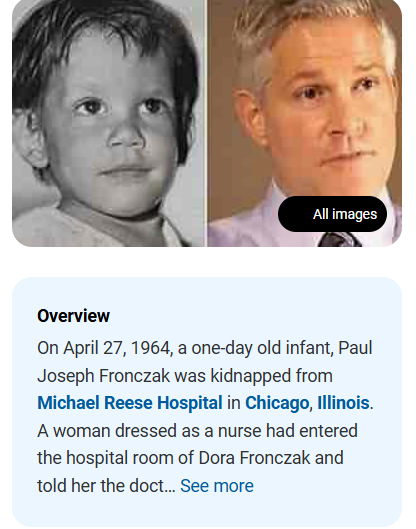

ÿ®ÿπÿ∂ Ÿáÿ§ŸÑÿßÿ° ŸÑŸäÿ≥Ÿàÿß ŸÖŸÖÿ´ŸÑŸäŸÜ ÿßÿµŸÑÿß !

ŸÑŸÜÿ≠ŸÑŸÑ ÿßŸÉÿ´ÿ± , ÿØÿπŸÜÿß ŸÜÿ±Ÿâ ÿßŸÑÿ≥ŸÖÿßÿ™ ÿßŸÑÿ±ÿ¶Ÿäÿ≥Ÿäÿ©

In [ ]:
missing_actor_rating=missing_actor_rating.drop(columns=['overview','popularity','release_date','budget','status', 'tagline', 'vote_average', 'vote_count','release_day', 'unique_actors_count', 'actors_avg_rating'])

In [ ]:
missing_actor_rating.head(5)

id                      title             genres original_language  \
2445  923632        The Tinder Swindler  Documentary-Crime                en   
4064  489988  Three Identical Strangers        Documentary                en   
4296  789371           Kings Of Astoria        Crime-Drama                en   
4559    1776                 Jesus Camp        Documentary                en   
4691  675776                    Persona   Thriller-Romance                en   

              production_companies    revenue  runtime  \
2445  RAW-Gaspin Media-AGC Studios        0.0    114.0   
4064      Channel 4 Television-RAW  1041955.0     97.0   
4296              Davi Productions        0.0    105.0   
4559     A&E IndieFilms-Loki Films  1013596.0     84.0   
4691                    FILOMINATI        0.0     75.0   

                                                credits  tagline_sentiment  \
2445  Shimon Yehuda Hayut-Cecilie Fjellh√∏y-Pernilla ...                  1   
4064  David Kellman-Robert Shafran-Edward Galland-La...                  1   
4296     Giuseppe Davi-Giacomo Davi-Sal Davi-Erica Rosa                  0   
4559  Becky Fischer-Mike Papantonio-Ted Haggard-Lou ...                  0   
4691                       Nick Cause-Angelina Mosesova                 -1   

         profit  release_year  release_month  
2445        0.0          2022              2  
4064  1041955.0          2018              6  
4296    -5000.0          2022              6  
4559  1013596.0          2006              9  
4691        0.0          2022             10

In [ ]:

documentary_count = missing_actor_rating['genres'].str.contains('Documentary', na=False).sum()

print(f"Number of movies in missing_actor_rating with 'Documentary' genre: {documentary_count}")


Number of movies in missing_actor_rating with 'Documentary' genre: 1385


ÿ≠ÿ≥ŸÜÿß , ÿßÿ∫ŸÑŸäÿ®ÿ™ŸáŸÖ Ÿàÿ¶ÿßŸÇŸäÿßÿ™ , ÿØÿπŸÜÿß ŸÜÿ™ÿÆŸÑÿµ ŸÖŸÜŸáÿß

In [ ]:
# prompt: drop entries where missing_actor_rating['genres'] contains Documentary

# Check the initial size of the DataFrame
initial_rows = missing_actor_rating.shape[0]
print(f"Initial shape of missing_actor_rating: {missing_actor_rating.shape}")

# Drop rows where the 'genres' column contains the string 'Documentary'
# The '~' inverts the boolean mask. na=False treats NaN values as not containing 'Documentary'.
missing_actor_rating = missing_actor_rating[~missing_actor_rating['genres'].str.contains('Documentary', na=False)].copy()

# Check the size after dropping
final_rows = missing_actor_rating.shape[0]
dropped_rows = initial_rows - final_rows

print(f"Shape of missing_actor_rating after dropping Documentary: {missing_actor_rating.shape}")
print(f"Number of rows dropped (Documentary genre): {dropped_rows}")

# Display the first few rows of the modified DataFrame
print("\nmissing_actor_rating after dropping Documentary (first 5 rows):")

In [ ]:
missing_actor_rating.info()

<class 'pandas.core.frame.DataFrame'>
Index: 644 entries, 4296 to 41377
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    644 non-null    int64  
 1   title                 644 non-null    object 
 2   genres                644 non-null    object 
 3   original_language     644 non-null    object 
 4   production_companies  644 non-null    object 
 5   revenue               644 non-null    float64
 6   runtime               644 non-null    float64
 7   credits               644 non-null    object 
 8   tagline_sentiment     644 non-null    int64  
 9   profit                644 non-null    float64
 10  release_year          644 non-null    int64  
 11  release_month         644 non-null    int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 65.4+ KB


In [ ]:
missing_actor_rating.head(5)

id                       title               genres  \
4296  789371            Kings Of Astoria          Crime-Drama   
4691  675776                     Persona     Thriller-Romance   
5800  787282  Beyond: The Motion Picture      Science Fiction   
6221  963804                     Cascade  Music-Romance-Drama   
6225  950120                 Acidic Anna      Horror-Thriller   

     original_language                              production_companies  \
4296                en                                  Davi Productions   
4691                en                                        FILOMINATI   
5800                en  Innovative Arts-Underdog Pictures-Jackson Motion   
6221                en                           Ultraviolet Productions   
6225                en                                 Space Czech Films   

      revenue  runtime                                            credits  \
4296      0.0    105.0     Giuseppe Davi-Giacomo Davi-Sal Davi-Erica Rosa   
4691      0.0     75.0                       Nick Cause-Angelina Mosesova   
5800      0.0     91.0  Lukas Jackson-Marius Johnsson-Sander R. D. Lar...   
6221      0.0     40.0  James Seed-Paige Hurrell-Kalvin Taylor-Delaney...   
6225      0.0     73.0  Thomas Cam-Dasha Diviskova-Dimitrah Vlad-Stell...   

      tagline_sentiment  profit  release_year  release_month  
4296                  0 -5000.0          2022              6  
4691                 -1     0.0          2022             10  
5800                  1  -500.0          2023             11  
6221                  0  -400.0          2022              6  
6225                 -1 -1000.0          2022              6

In [ ]:
missing_actor_rating['profit'].describe()

count    6.440000e+02
mean     1.522974e+05
std      3.941098e+06
min     -1.000000e+06
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.999900e+07
Name: profit, dtype: float64

In [ ]:
(missing_actor_rating['revenue']==0).sum()

np.int64(604)

ÿ®ÿπÿ∂ÿπŸáŸÖ ŸÑŸÖ Ÿäÿ£ÿ™Ÿà ÿ®ÿßŸä ÿßÿ±ÿßÿØÿßÿ™ , Ÿà Ÿáÿ∞ÿß ŸäŸÖŸÉŸÜ ÿßŸÜ ŸäŸÅÿ≥ÿ± ÿ®ÿßŸÜŸáÿß ŸÇŸäŸÖ ŸÖŸÅŸÇŸàÿØÿ© ÿßŸà ÿßŸÜŸáÿß ÿßŸÅŸÑÿßŸÖ <br>
straight to dvd

In [ ]:
# prompt: drop entires where missing_actor_rating['revenue']==0

# Check the initial size of the DataFrame
initial_rows = missing_actor_rating.shape[0]
print(f"Initial shape of missing_actor_rating: {missing_actor_rating.shape}")

# Drop rows where the 'revenue' column is exactly 0
missing_actor_rating = missing_actor_rating[missing_actor_rating['revenue'] != 0].copy()

# Check the size after dropping
final_rows = missing_actor_rating.shape[0]
dropped_rows = initial_rows - final_rows

print(f"Shape of missing_actor_rating after dropping rows with revenue == 0: {missing_actor_rating.shape}")
print(f"Number of rows dropped (revenue == 0): {dropped_rows}")

# Display the first few rows of the modified DataFrame
print("\nmissing_actor_rating after dropping revenue == 0 (first 5 rows):")
print(missing_actor_rating.head())
print("\nmissing_actor_rating info:")
missing_actor_rating.info()

Initial shape of missing_actor_rating: (644, 12)
Shape of missing_actor_rating after dropping rows with revenue == 0: (40, 12)
Number of rows dropped (revenue == 0): 604

missing_actor_rating after dropping revenue == 0 (first 5 rows):
           id                title                 genres original_language  \
6289   949273  TacoTown: The Movie        Thriller-Comedy                en   
19463  711615           Batman Jr.                 Action                en   
21801  896605            Slay Ride  Comedy-Horror-Mystery                en   
28271  672815   ALL COPS AIN'T BAD                 Comedy                en   
29094  748806             Brothers                  Drama                en   

               production_companies   revenue  runtime  \
6289               TacoTales Movies       1.0     50.0   
19463                         TOCCU    1700.0    116.0   
21801  McLean & Cipullo Productions    2000.0     60.0   
28271                  VH2 Networks  350000.0     61.0   

In [ ]:
missing_actor_rating.sample(5)

id                              title                 genres  \
40679  817809                Come Forth Reverend        Action-Thriller   
21801  896605                          Slay Ride  Comedy-Horror-Mystery   
29914  742459                              Sosha         Comedy-Romance   
39793  709456                      Miss Gangster          Drama-Romance   
40458  895937  Jorja Smith - Live at Glastonbury                  Music   

      original_language          production_companies   revenue  runtime  \
40679                en                  Luckee Films      28.0     39.0   
21801                en  McLean & Cipullo Productions    2000.0     60.0   
29914                en          LIM STUDIO-STONMEDIA    1800.0     50.0   
39793                en           CJ HK Entertainment  486842.0     92.0   
40458                en                           BBC     100.0     56.0   

                                                 credits  tagline_sentiment  \
40679  Coleton McCants-Gavin Ryan-Gavin Robbins-Culle...                  0   
21801  Collin McLean-Dominic Cipullo-Trey Gourgeot-No...                  1   
29914  Lebogang Lebang-Themba Nene-Lebo Lebang-Mbalen...                  0   
39793  Nguy·ªÖn Minh T√∫-Cao Thi√™n Trang-H·ªìng ƒê√†o-Ch·∫ø Ng...                  1   
40458                                        Jorja Smith                  0   

         profit  release_year  release_month  
40679      26.0          2021              1  
21801   -3001.0          2022              6  
29914       0.0          2022             11  
39793  486842.0          2019             11  
40458       0.0          2019              6

In [ ]:
(missing_actor_rating['runtime'] < 60).sum()

np.int64(17)

ÿ®ÿπÿ∂ŸáŸÖ ŸÑŸäÿ≥Ÿàÿß ÿßŸÅŸÑÿßŸÖ ÿßÿµŸÑÿßŸã

In [ ]:
# prompt: drop these (missing_actor_rating['runtime'] < 60)

# Check the initial size of the DataFrame
initial_rows = missing_actor_rating.shape[0]
print(f"Initial shape of missing_actor_rating: {missing_actor_rating.shape}")

# Drop rows where the 'runtime' column is less than 60
missing_actor_rating = missing_actor_rating[~(missing_actor_rating['runtime'] < 60)].copy()

# Check the size after dropping
final_rows = missing_actor_rating.shape[0]
dropped_rows = initial_rows - final_rows

print(f"Shape of missing_actor_rating after dropping rows with runtime < 60: {missing_actor_rating.shape}")
print(f"Number of rows dropped (runtime < 60): {dropped_rows}")

# Display the first few rows of the modified DataFrame
print("\nmissing_actor_rating after dropping runtime < 60 (first 5 rows):")
print(missing_actor_rating.head())
print("\nmissing_actor_rating info:")
missing_actor_rating.info()


Initial shape of missing_actor_rating: (40, 12)
Shape of missing_actor_rating after dropping rows with runtime < 60: (23, 12)
Number of rows dropped (runtime < 60): 17

missing_actor_rating after dropping runtime < 60 (first 5 rows):
           id                   title                 genres  \
19463  711615              Batman Jr.                 Action   
21801  896605               Slay Ride  Comedy-Horror-Mystery   
28271  672815      ALL COPS AIN'T BAD                 Comedy   
30770  591660  ROW Ladies Night Out 4           Action-Drama   
30960  587961  Queens of Combat QOC 2           Action-Drama   

      original_language          production_companies   revenue  runtime  \
19463                en                         TOCCU    1700.0    116.0   
21801                en  McLean & Cipullo Productions    2000.0     60.0   
28271                en                  VH2 Networks  350000.0     61.0   
30770                en          Reality Of Wrestling    6555.0    147.0   
3

In [ ]:
missing_actor_rating

id                                     title  \
19463  711615                                Batman Jr.   
21801  896605                                 Slay Ride   
28271  672815                        ALL COPS AIN'T BAD   
30770  591660                    ROW Ladies Night Out 4   
30960  587961                    Queens of Combat QOC 2   
32132  591658                    ROW Ladies Night Out 3   
32210  587980                   Queens Of Combat QOC 12   
33430  588002                   Queens Of Combat QOC 22   
33765  591659                   ROW Ladies Night Out II   
34181  588007                   Queens Of Combat QOC 25   
34198  587995                   Queens Of Combat QOC 20   
35197  497702                              Street Hoopz   
35254  591132  Queens of Combat Invade Supercon Night 1   
35983  588005                   Queens Of Combat QOC 24   
36593  587979                   Queens Of Combat QOC 11   
37036  933511                       I was not murdered.   
37206  594791                   Girl Fight Wrestling 11   
37463  587999                   Queens Of Combat QOC 21   
37562  587983                   Queens Of Combat QOC 14   
37754  375036                    Vipin and Rosh Wedding   
38286  588003                   Queens Of Combat QOC 23   
39241  587985                   Queens Of Combat QOC 15   
39793  709456                             Miss Gangster   

                      genres original_language          production_companies  \
19463                 Action                en                         TOCCU   
21801  Comedy-Horror-Mystery                en  McLean & Cipullo Productions   
28271                 Comedy                en                  VH2 Networks   
30770           Action-Drama                en          Reality Of Wrestling   
30960           Action-Drama                en    Queens Of Combat-HighSpots   
32132           Action-Drama                en          Reality Of Wrestling   
32210           Action-Drama                en              Queens Of Combat   
33430           Action-Drama                en              Queens Of Combat   
33765           Action-Drama                en          Reality Of Wrestling   
34181           Action-Drama                en              Queens Of Combat   
34198           Action-Drama                en              Queens Of Combat   
35197     Action-Crime-Drama                en                Lee Production   
35254           Drama-Action                en              Queens Of Combat   
35983           Action-Drama                en              Queens Of Combat   
36593           Action-Drama                en              Queens Of Combat   
37036          Drama-Mystery                en                Hobnob Studios   
37206           Action-Drama                en                    Girl Fight   
37463           Action-Drama                en              Queens Of Combat   
37562           Drama-Action                en              Queens Of Combat   
37754              Adventure                en                       J.D MAX   
38286           Drama-Action                en              Queens Of Combat   
39241           Action-Drama                en              Queens Of Combat   
39793          Drama-Romance                en           CJ HK Entertainment   

        revenue  runtime                                            credits  \
19463    1700.0    116.0     Nicholas Onciul-Zachary Onciul-Samantha Onciul   
21801    2000.0     60.0  Collin McLean-Dominic Cipullo-Trey Gourgeot-No...   
28271  350000.0     61.0                                    Daryll Triplett   
30770    6555.0    147.0  Alex Gracia-Vannarah Riggs-Kiera Hogan-Iveliss...   
30960    5495.0    120.0  Amy Jefferson-Christina Garibaldi-Rachel Barri...   
32132    9885.0    122.0  Ivelisse V√©lez-Kiera Hogan-Shojo Machiko-Calle...   
32210   13230.0     78.0  Dominique Fabiano-Taeler Conrad-Mellen-Tessa B...   
33430    8999.0     90.0  Kiera Hogan-Ol

ŸáŸÜÿß ŸÜÿ±Ÿâ ÿßŸÅŸÑÿßŸÖ Ÿàÿ¶ÿßŸÇŸäÿ© Ÿà ŸÑŸÉŸÜŸáÿß ŸÑŸÖ ÿ™ÿµŸÜŸÅ ÿßŸÜŸáÿß Ÿàÿ´ÿßÿ¶ŸÇŸäÿ© , Ÿà ŸÜÿ±Ÿâ ÿ®ÿπÿ∂ ÿπÿ±Ÿàÿ∂ ÿßŸÑŸÖÿµÿßÿ±ÿπÿ©

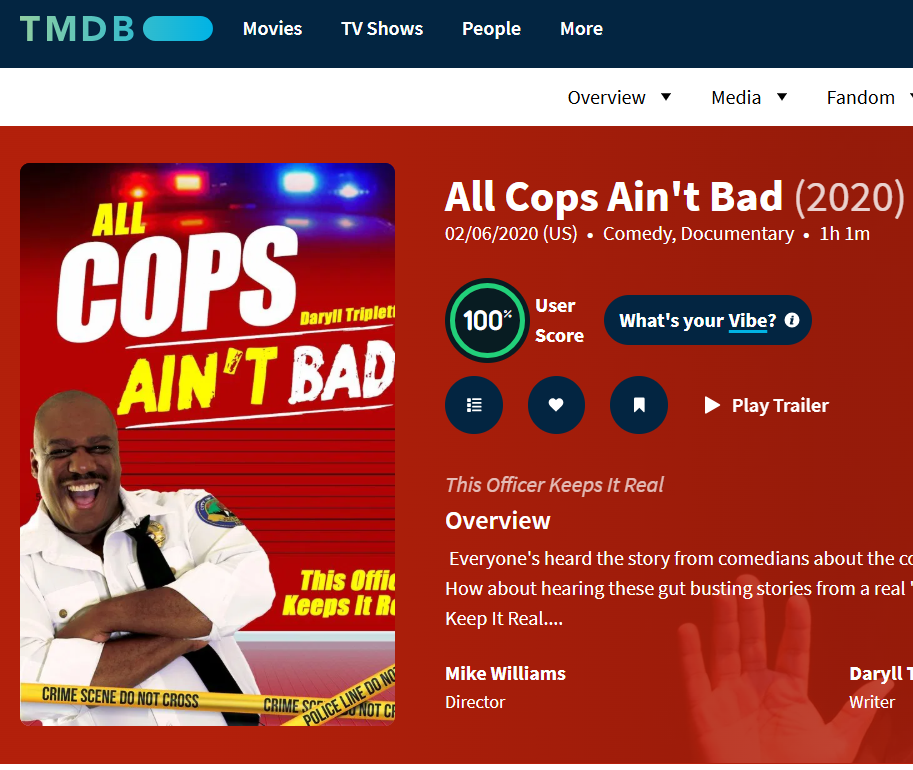

In [68]:
# prompt: upload leen_han_movies_df as csv file to drive



# # Mount Google Drive
# drive.mount('/content/drive')

# # Define the path where you want to save the CSV in your Drive
# output_path = '/content/drive/My Drive/leen_movies_df.csv'

# Save the DataFrame as a CSV file to Google Driveÿ¥
# leen_movies_df.to_csv(output_path, index=False)

# print(f"DataFrame 'leen_han_movies_df' successfully saved as CSV to {output_path}")


Mounted at /content/drive
DataFrame 'leen_han_movies_df' successfully saved as CSV to /content/drive/My Drive/leen_movies_df.csv


In [ ]:
# # prompt: upload leen_han_movies_df as csv file to drive



# # Mount Google Drive
# drive.mount('/content/drive')

# # Define the path where you want to save the CSV in your Drive
# output_path = '/content/drive/My Drive/actors_rating.csv'

# # Save the DataFrame as a CSV file to Google Drive
# actors_rating_hanna_df.to_csv(output_path, index=False)

# print(f"DataFrame 'leen_han_movies_df' successfully saved as CSV to {output_path}")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
DataFrame 'leen_han_movies_df' successfully saved as CSV to /content/drive/My Drive/actors_rating.csv


In [ ]:
drive.mount('/content/drive')

# Define the path where you want to save the CSV in your Drive
output_path = '/content/drive/My Drive/actors_df.csv'

# Save the DataFrame as a CSV file to Google Drive
actors_rating_hanna_df.to_csv(output_path, index=False)

print(f"DataFrame 'actors_rating_hanna_df' successfully saved as CSV to {output_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
DataFrame 'actors_rating_hanna_df' successfully saved as CSV to /content/drive/My Drive/actors_df.csv


# ÿßŸÑÿßŸàÿ≥ŸÉÿßÿ± 
---
features that will add more favouritism to movies/actors  
ŸÖŸäÿ≤ÿßÿ™ ÿ≥ÿ™ÿ∂ŸäŸÅ ÿ™ŸÖŸäÿ≤ ÿßŸÉÿ´ÿ± ŸÑŸÑŸÖŸÖÿ´ŸÑŸäŸÜ ŸàÿßŸÑÿßŸÅŸÑÿßŸÖ 


## ÿ™ÿ≠ŸÖŸäŸÑ ÿ®ŸäÿßŸÜÿßÿ™ ÿßŸÑÿßŸàÿ≥ŸÉÿßÿ±

In [ ]:
# Download latest version
path = kagglehub.dataset_download("unanimad/the-oscar-award")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/the-oscar-award


In [ ]:
oscars_df = pd.read_csv('/kaggle/input/the-oscar-award/the_oscar_award.csv')

oscars_df.head()

year_film  year_ceremony  ceremony category             canon_category  \
0       1927           1928         1    ACTOR    ACTOR IN A LEADING ROLE   
1       1927           1928         1    ACTOR    ACTOR IN A LEADING ROLE   
2       1927           1928         1    ACTOR    ACTOR IN A LEADING ROLE   
3       1927           1928         1    ACTOR    ACTOR IN A LEADING ROLE   
4       1927           1928         1  ACTRESS  ACTRESS IN A LEADING ROLE   

                  name                    film  winner  
0  Richard Barthelmess               The Noose   False  
1  Richard Barthelmess  The Patent Leather Kid   False  
2        Emil Jannings        The Last Command    True  
3        Emil Jannings    The Way of All Flesh    True  
4       Louise Dresser         A Ship Comes In   False

---
## ŸÅÿ≠ÿµ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ 
---

In [ ]:
oscars_df['category'].value_counts()

category
DIRECTING                                    476
FILM EDITING                                 455
ACTOR IN A SUPPORTING ROLE                   445
ACTRESS IN A SUPPORTING ROLE                 445
BEST PICTURE                                 381
                                            ... 
SPECIAL ACHIEVEMENT AWARD                      3
SPECIAL FOREIGN LANGUAGE FILM AWARD            2
DIRECTING (Comedy Picture)                     2
SPECIAL ACHIEVEMENT AWARD (Sound Effects)      1
SPECIAL ACHIEVEMENT AWARD (Sound Editing)      1
Name: count, Length: 118, dtype: int64

In [ ]:
oscars_df['category'].unique()

array(['ACTOR', 'ACTRESS', 'ART DIRECTION', 'CINEMATOGRAPHY',
       'DIRECTING (Comedy Picture)', 'DIRECTING (Dramatic Picture)',
       'ENGINEERING EFFECTS', 'OUTSTANDING PICTURE',
       'UNIQUE AND ARTISTIC PICTURE', 'WRITING (Adaptation)',
       'WRITING (Original Story)', 'WRITING (Title Writing)',
       'SPECIAL AWARD', 'DIRECTING', 'WRITING', 'OUTSTANDING PRODUCTION',
       'SOUND RECORDING', 'SHORT SUBJECT (Cartoon)',
       'SHORT SUBJECT (Comedy)', 'SHORT SUBJECT (Novelty)',
       'ASSISTANT DIRECTOR', 'FILM EDITING', 'MUSIC (Scoring)',
       'MUSIC (Song)', 'DANCE DIRECTION', 'WRITING (Screenplay)',
       'ACTOR IN A SUPPORTING ROLE', 'ACTRESS IN A SUPPORTING ROLE',
       'SHORT SUBJECT (Color)', 'SHORT SUBJECT (One-reel)',
       'SHORT SUBJECT (Two-reel)', 'IRVING G. THALBERG MEMORIAL AWARD',
       'MUSIC (Original Score)', 'CINEMATOGRAPHY (Black-and-White)',
       'CINEMATOGRAPHY (Color)', 'SPECIAL EFFECTS',
       'ART DIRECTION (Black-and-White)', 'ART DIRECT

---
## ÿ≥ŸÖÿ© ÿßŸÑÿßŸàÿ≥ŸÉÿßÿ± ŸÑŸÑÿßŸÅŸÑÿßŸÖ 
---

In [ ]:

#  Normalize titles for matching
def normalize_title(title):
    if pd.isna(title):
        return ""
    title = title.lower()
    title = re.sub(r'[^a-z0-9]', '', title)  # remove non-alphanumeric
    return title

oscars_df['normalized_film'] = oscars_df['film'].apply(normalize_title)
leen_movies_df['normalized_title'] = leen_movies_df['title'].apply(normalize_title)

# ‚ú® Find intersection
matched_movies = leen_movies_df['normalized_title'].isin(oscars_df['normalized_film'])
num_matched_movies = matched_movies.sum()

print(f"matched movies :  {num_matched_movies}")


matched movies :  3097


In [ ]:
# ‚ú® Create map from normalized title to highest oscar status
# 0: not nominated, 1: nominated, 2: winner

# First compute status per movie
oscars_df['winner_numeric'] = oscars_df['winner'].apply(lambda x: 2 if x else 1)

# Get highest status per film
oscar_movie_status = oscars_df.groupby('normalized_film')['winner_numeric'].max().to_dict()

# Map status to leen_movies_df
def get_movie_oscar_status(normalized_title, oscar_map):
    return oscar_map.get(normalized_title, 0)

leen_movies_df['movie_oscar'] = leen_movies_df['normalized_title'].apply(
    lambda x: get_movie_oscar_status(x, oscar_movie_status)
)

print("\n--- movie_oscar ---")
print(leen_movies_df[['title', 'movie_oscar']].head(10))



--- movie_oscar ---
                                 title  movie_oscar
0                    Meg 2: The Trench            0
1                  The Pope's Exorcist            0
2                 Deadpool & Wolverine            0
3     Transformers: Rise of the Beasts            0
4                       Dune: Part Two            2
5                Venom: The Last Dance            0
6    Ant-Man and the Wasp: Quantumania            0
7                            Creed III            0
8              Insidious: The Red Door            0
9  Spider-Man: Across the Spider-Verse            1


In [ ]:
leen_movies_df['movie_oscar'].value_counts()

movie_oscar
0    38302
1     2109
2      988
Name: count, dtype: int64

## ÿ≥ŸÖÿ© ÿßŸàÿ≥ŸÉÿßÿ± ŸÑŸÉÿßÿØÿ± ÿßŸÑŸÅŸÑŸÖ 

In [ ]:

# üü£ ŸÑÿØŸäŸÉ ÿ®ÿßŸÑŸÅÿπŸÑ Ÿáÿ∞ÿß ÿßŸÑŸÄ normalize_and_split_credits:
def normalize_and_split_credits(credits_string):
    if pd.isna(credits_string):
        return []
    return [
        re.sub(r'\s+', '', actor.lower())
        for actor in credits_string.split('-') if actor.strip()
    ]

leen_movies_df['normalized_credits_list'] = leen_movies_df['credits'].apply(normalize_and_split_credits)

# üü£ Normalize names ŸÅŸä oscars_df
oscars_df['normalized_name'] = oscars_df['name'].apply(lambda x: re.sub(r'[^a-z0-9]', '', x.lower()) if pd.notna(x) else "")

# üü£ ÿ≠ÿ≥ÿßÿ® ÿ≠ÿßŸÑÿ© ÿßŸÑÿ£Ÿàÿ≥ŸÉÿßÿ± ŸÑŸÉŸÑ ÿ¥ÿÆÿµ
oscars_df['winner_numeric'] = oscars_df['winner'].apply(lambda x: 2 if x else 1)

# üü£ ÿπŸÖŸÑ ÿÆÿ±Ÿäÿ∑ÿ©: ÿßŸÑÿßÿ≥ŸÖ ‚Üí ÿ£ÿπŸÑŸâ ÿ≠ÿßŸÑÿ© ÿ£Ÿàÿ≥ŸÉÿßÿ±
oscar_person_status = oscars_df.groupby('normalized_name')['winner_numeric'].max().to_dict()

# üü£ ÿØÿßŸÑÿ© ŸÑÿ™ÿ≠ÿØŸäÿØ ÿ≠ÿßŸÑÿ© ÿßŸÑÿ£Ÿàÿ≥ŸÉÿßÿ± ŸÑÿ£ÿ≥ŸÖÿßÿ° ÿßŸÑŸÅŸäŸÑŸÖ ŸÉŸÑŸáÿß
def get_movie_credits_oscar_status(credits_list, oscar_map):
    found_statuses = [
        oscar_map[name]
        for name in credits_list
        if name in oscar_map
    ]
    if not found_statuses:
        return 0
    else:
        return max(found_statuses)  # ÿ•ÿ∞ÿß ŸáŸÜÿßŸÉ ÿ£ŸÉÿ´ÿ± ŸÖŸÜ ÿ¥ÿÆÿµÿå ÿÆÿ∞ ÿ£ÿπŸÑŸâ ÿ≠ÿßŸÑÿ© (2 > 1 > 0)

# üü£ ÿ∑ÿ®ŸÇ ÿπŸÑŸâ ÿßŸÑÿ£ŸÅŸÑÿßŸÖ
leen_movies_df['movie_credits_oscar'] = leen_movies_df['normalized_credits_list'].apply(
    lambda x: get_movie_credits_oscar_status(x, oscar_person_status)
)

# üü£ ÿπÿ±ÿ∂ ÿπŸäŸÜÿ©
print("\n---  movie_credits_oscar ---")
print(leen_movies_df[['title', 'movie_credits_oscar']].head(10))



---  movie_credits_oscar ---
                                 title  movie_credits_oscar
0                    Meg 2: The Trench                    0
1                  The Pope's Exorcist                    2
2                 Deadpool & Wolverine                    2
3     Transformers: Rise of the Beasts                    2
4                       Dune: Part Two                    2
5                Venom: The Last Dance                    1
6    Ant-Man and the Wasp: Quantumania                    2
7                            Creed III                    0
8              Insidious: The Red Door                    1
9  Spider-Man: Across the Spider-Verse                    2


In [ ]:
leen_movies_df['movie_credits_oscar'].value_counts()

movie_credits_oscar
0    25255
2     9838
1     6306
Name: count, dtype: int64

In [ ]:
leen_movies_df

id                                          title  \
0      615656                              Meg 2: The Trench   
1      758323                            The Pope's Exorcist   
2      533535                           Deadpool & Wolverine   
3      667538               Transformers: Rise of the Beasts   
4      693134                                 Dune: Part Two   
...       ...                                            ...   
41394  616368                                   The Cavalier   
41395  397861                Paradise Lost: Over the Madness   
41396  728369  Campeones:  1978 FIFA World Cup official film   
41397  947763                                      Endurance   
41398  527223                                Strictly Modern   

                                 genres original_language  \
0         Action-Science Fiction-Horror                en   
1               Horror-Mystery-Thriller                en   
2         Action-Comedy-Science Fiction                en   
3      Action-Adventure-Science Fiction                en   
4             Science Fiction-Adventure                en   
...                                 ...               ...   
41394            Adventure-Action-Drama                en   
41395                 Documentary-Music                en   
41396                       Documentary                en   
41397                       Documentary                en   
41398                    Comedy-Romance                en   

                                                overview  popularity  \
0      An exploratory dive into the deepest depths of...    8763.998   
1      Father Gabriele Amorth Chief Exorcist of the V...    5953.227   
2      A listless Wade Wilson toils away in civilian ...    5410.496   
3      When a new threat capable of destroying the en...    5409.104   
4      Follow the mythic journey of Paul Atreides as ...    4742.163   
...                                                  ...         ...   
41394  In old Mexico a masked rider (Talmadge) and an...       0.448   
41395  In a career that has spanned 20 years (and cou...       0.442   
41396  The FIFA official film of the 1978 World Cup h...       0.255   
41397  A century after Shackleton's Endurance sank be...       0.001   
41398  Strictly Modern is a 1930 American pre-Code co...       0.001   

                                    production_companies release_date  \
0      Apelles Entertainment-Warner Bros. Pictures-di...   2023-08-02   
1      Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...   2023-04-05   
2      Marvel Studios-Maximum Effort-21 Laps Entertai...   2024-07-24   
3      Skydance-Paramount-di Bonaventura Pictures-Bay...   2023-06-06   
4                                     Legendary Pictures   2024-02-27   
...                                                  ...          ...   
41394                          Tiffany-Stahl Productions   1928-11-01   
41395                                 Kayane Productions   2007-05-28   
41396                                         FIFA Films   1978-01-01   
41397  Little Dot Studios-Little Monster Films-Histor...   2024-10-14   
41398  First National Pictures-Warner Bros. Entertain...   1930-03-02   

            budget       revenue  ...  release_month release_day  \
0      129000000.0  3.520565e+08  ...              8           2   
1       18000000.0  6.567582e+07  ...              4           5   
2      200000000.0  1.326387e+09  ...              7          24   
3      200000000.0  4.070455e+08  ...              6           6   
4      190000000.0  6.838137e+08  ...              2          27   
...            ...           ...  ...            ...         ...   
41394          0.0  0.000000e+00  ...             11           1   
41395         50.0  0.000000e+00  ...              5          28   
41396          0.0  0.000000e+00  ...              1           1   
41397          0.0  0.000000e+00  ...             10          14   
41398          0.0 

## ÿ≥ŸÖÿ© ÿßŸÑÿßŸàÿ≥ŸÉÿßÿ± ŸÑŸÑÿ¥ÿ±ŸÉÿßÿ™ ÿßŸÑŸÖŸÜÿ™ÿ¨ÿ©

In [ ]:

# Step 1: Normalize movie titles in oscars_df (already done if you ran before)
if 'normalized_film' not in oscars_df.columns:
    def normalize_title(title):
        if pd.isna(title):
            return ""
        title = title.lower()
        title = re.sub(r'[^a-z0-9]', '', title)  # remove non-alphanumeric
        return title
    oscars_df['normalized_film'] = oscars_df['film'].apply(normalize_title)

# Step 2: Calculate the Oscar status (1 for nominated, 2 for winner) per movie
oscars_df['winner_numeric'] = oscars_df['winner'].apply(lambda x: 2 if x else 1)

# Step 3: Get highest oscar status per movie
oscar_movie_status = oscars_df.groupby('normalized_film')['winner_numeric'].max().to_dict()

# Step 4: Normalize production companies in leen_movies_df
# production_companies may be a string like 'Company A, Company B', so split and normalize each company
def normalize_company_list(companies_string):
    if pd.isna(companies_string):
        return []
    # split by comma and clean spaces
    companies = [comp.strip().lower() for comp in companies_string.split(',')]
    # remove non-alphanumeric characters for consistency
    companies = [re.sub(r'[^a-z0-9]', '', c) for c in companies if c]
    return companies

leen_movies_df['normalized_companies_list'] = leen_movies_df['production_companies'].apply(normalize_company_list)

# Step 5: Map each movie to its Oscar status (0 if no nomination)
leen_movies_df['movie_oscar_status'] = leen_movies_df['normalized_title'].map(oscar_movie_status).fillna(0).astype(int)

# Step 6: Aggregate Oscar wins/nominations count per company across movies
from collections import defaultdict

company_oscars_count = defaultdict(int)

for idx, row in leen_movies_df.iterrows():
    companies = row['normalized_companies_list']
    movie_oscar = row['movie_oscar_status']
    for company in companies:
        company_oscars_count[company] += movie_oscar

# Step 7: Create a company -> oscar count lookup dict
# (already in company_oscars_count)

# Step 8: Define a function to get total oscar count for a movie's companies
def get_company_oscars(companies_list, oscar_count_map):
    total = 0
    for company in companies_list:
        total += oscar_count_map.get(company, 0)
    return total

# Step 9: Apply function to create feature
leen_movies_df['company_oscars'] = leen_movies_df['normalized_companies_list'].apply(
    lambda comps: get_company_oscars(comps, company_oscars_count)
)

# Step 10: Clean up temp columns if desired
leen_movies_df.drop(columns=['normalized_companies_list', 'movie_oscar_status'], inplace=True)

# Show sample
print("\n--- Sample of new feature company_oscars ---")
print(leen_movies_df[['title', 'production_companies', 'company_oscars']].head(10))



--- Sample of new feature company_oscars ---
                                 title  \
0                    Meg 2: The Trench   
1                  The Pope's Exorcist   
2                 Deadpool & Wolverine   
3     Transformers: Rise of the Beasts   
4                       Dune: Part Two   
5                Venom: The Last Dance   
6    Ant-Man and the Wasp: Quantumania   
7                            Creed III   
8              Insidious: The Red Door   
9  Spider-Man: Across the Spider-Verse   

                                production_companies  company_oscars  
0  Apelles Entertainment-Warner Bros. Pictures-di...               0  
1  Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...               0  
2  Marvel Studios-Maximum Effort-21 Laps Entertai...               0  
3  Skydance-Paramount-di Bonaventura Pictures-Bay...               0  
4                                 Legendary Pictures               4  
5  Columbia Pictures-Pascal Pictures-Matt Tolmach...             

In [ ]:
leen_movies_df['company_oscars'].value_counts()

company_oscars
0      30628
1       2207
2       1118
104      896
254      865
182      797
72       682
149      645
177      614
28       532
3        515
71       461
25       258
19       214
4        204
5        162
14       150
7        118
8         94
6         92
12        47
17        32
20        24
13        23
10        21
Name: count, dtype: int64

#  EDA

# ÿ™ÿ≠ŸÑŸäŸÑ ÿßÿ≥ÿ™ŸÉÿ¥ÿßŸÅŸä ŸÑŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿßŸÑŸÖÿ™ÿπŸÑŸÇÿ© ÿ®ÿßŸÑÿßŸàÿ≥ŸÉÿßÿ± 

### ŸÉŸÖ ÿπÿØÿØ ÿßŸÑÿ£ŸÅŸÑÿßŸÖ ŸÅŸä ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿßŸÑÿ™Ÿä ŸÑÿØŸäŸáÿß ÿ™ÿ±ÿ¥Ÿäÿ≠ÿßÿ™ ÿ£Ÿà ÿ¨Ÿàÿßÿ¶ÿ≤ ÿ£Ÿàÿ≥ŸÉÿßÿ±ÿü



Count of movies by Oscar status:
movie_oscar
0    38302
1     2109
2      988
Name: count, dtype: int64


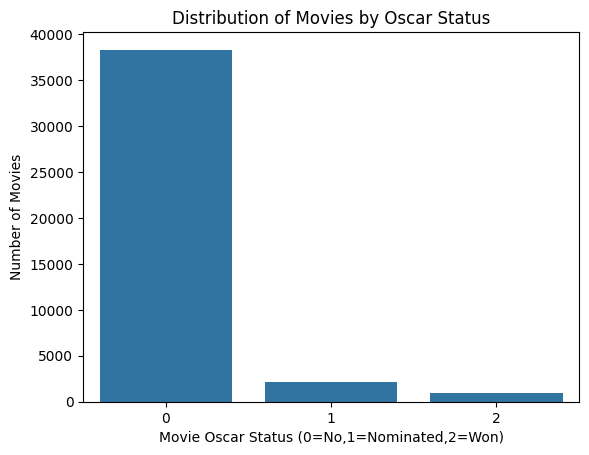

In [ ]:


print("Count of movies by Oscar status:")
movie_oscar_counts = leen_movies_df['movie_oscar'].value_counts().sort_index()
print(movie_oscar_counts)

# Plot bar chart
sns.barplot(x=movie_oscar_counts.index, y=movie_oscar_counts.values)
plt.xlabel('Movie Oscar Status (0=No,1=Nominated,2=Won)')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movies by Oscar Status')
plt.show()


### ŸÖÿß ŸáŸà ÿ™Ÿàÿ≤Ÿäÿπ ÿ≠ÿßŸÑÿ© ÿßŸÑÿ£Ÿàÿ≥ŸÉÿßÿ± ŸÅŸä ŸÅÿ±ŸäŸÇ ÿßŸÑÿπŸÖŸÑ (ÿßŸÑŸÖŸÖÿ´ŸÑŸäŸÜ ŸàÿßŸÑŸÖÿÆÿ±ÿ¨ŸäŸÜ)ÿü ŸÉŸÖ ŸÅŸäŸÑŸÖ ŸÑÿØŸäŸá ŸÅÿ±ŸäŸÇ ŸÖÿ±ÿ¥ÿ≠ ÿ£Ÿà ŸÅÿßÿ¶ÿ≤ ÿ®ÿßŸÑÿ£Ÿàÿ≥ŸÉÿßÿ±ÿü



Count of movies by credits Oscar status:
movie_credits_oscar
0    25255
1     6306
2     9838
Name: count, dtype: int64


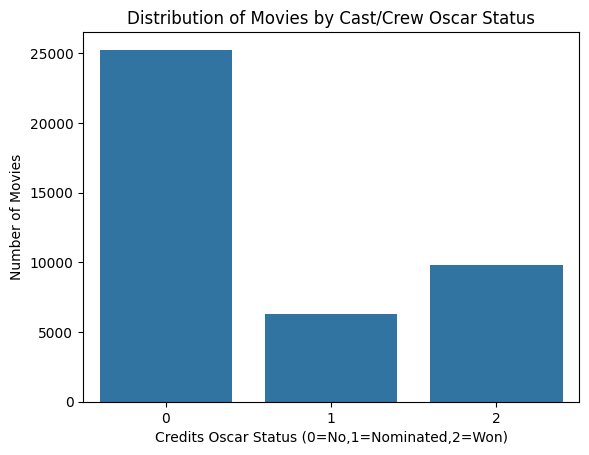

In [ ]:
print("Count of movies by credits Oscar status:")
credits_oscar_counts = leen_movies_df['movie_credits_oscar'].value_counts().sort_index()
print(credits_oscar_counts)

sns.barplot(x=credits_oscar_counts.index, y=credits_oscar_counts.values)
plt.xlabel('Credits Oscar Status (0=No,1=Nominated,2=Won)')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movies by Cast/Crew Oscar Status')
plt.show()


### ŸÖÿß ÿßŸÑÿπŸÑÿßŸÇÿ© ÿ®ŸäŸÜ ÿπÿØÿØ ÿ¨Ÿàÿßÿ¶ÿ≤ ÿßŸÑÿ£Ÿàÿ≥ŸÉÿßÿ± ŸÑÿ¥ÿ±ŸÉÿßÿ™ ÿßŸÑÿ•ŸÜÿ™ÿßÿ¨  Ÿàÿ≠ÿßŸÑÿ© ÿßŸÑÿ£Ÿàÿ≥ŸÉÿßÿ± ŸÑŸÑŸÅŸäŸÑŸÖ ŸÜŸÅÿ≥Ÿá ÿü



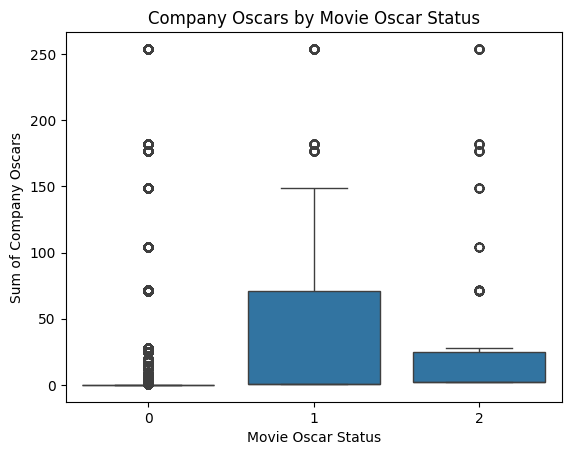

In [ ]:
sns.boxplot(x='movie_oscar', y='company_oscars', data=leen_movies_df)
plt.xlabel('Movie Oscar Status')
plt.ylabel('Sum of Company Oscars')
plt.title('Company Oscars by Movie Oscar Status')
plt.show()


### ŸÉŸäŸÅ ŸáŸà ÿ™Ÿàÿ≤Ÿäÿπ ÿπÿØÿØ ÿ¨Ÿàÿßÿ¶ÿ≤ ÿßŸÑÿ£Ÿàÿ≥ŸÉÿßÿ± ÿßŸÑÿ™Ÿä ÿ≠ÿµŸÑÿ™ ÿπŸÑŸäŸáÿß ÿ¥ÿ±ŸÉÿßÿ™ ÿßŸÑÿ•ŸÜÿ™ÿßÿ¨ ÿ®ÿ¥ŸÉŸÑ ÿπÿßŸÖÿü



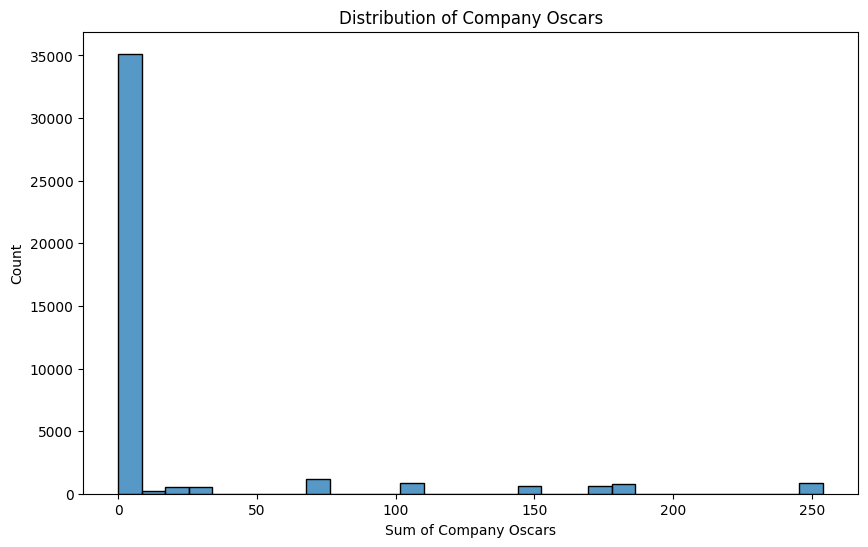

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(leen_movies_df['company_oscars'], bins=30, kde=False)
plt.xlabel('Sum of Company Oscars')
plt.title('Distribution of Company Oscars')
plt.show()


### ŸáŸÑ ŸáŸÜÿßŸÉ ÿπŸÑÿßŸÇÿ© ÿßÿ±ÿ™ÿ®ÿßÿ∑ ÿ®ŸäŸÜ ŸÖÿ™Ÿàÿ≥ÿ∑ ÿ™ŸÇŸäŸäŸÖ ÿßŸÑŸÖŸÖÿ´ŸÑŸäŸÜ  ŸàŸÖŸäÿ≤ÿßÿ™ ÿßŸÑÿ£Ÿàÿ≥ŸÉÿßÿ± ÿßŸÑŸÖÿÆÿ™ŸÑŸÅÿ©ÿü



                     actors_avg_rating  movie_oscar  movie_credits_oscar  \
actors_avg_rating             1.000000     0.130294             0.295808   
movie_oscar                   0.130294     1.000000             0.276116   
movie_credits_oscar           0.295808     0.276116             1.000000   
company_oscars                0.229988     0.128135             0.259672   

                     company_oscars  
actors_avg_rating          0.229988  
movie_oscar                0.128135  
movie_credits_oscar        0.259672  
company_oscars             1.000000  


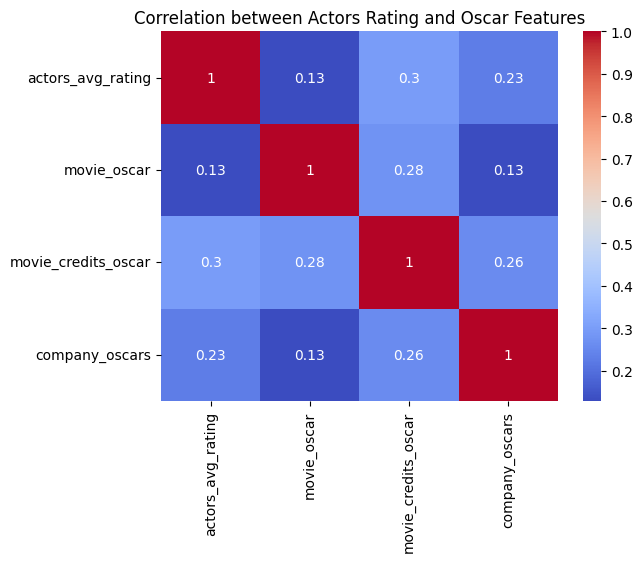

In [ ]:
corr_df = leen_movies_df[['actors_avg_rating', 'movie_oscar', 'movie_credits_oscar', 'company_oscars']]
corr = corr_df.corr()
print(corr)

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation between Actors Rating and Oscar Features')
plt.show()


# ÿ™ÿ≠ŸÑŸäŸÑ ÿßÿ≥ÿ™ŸÉÿ¥ÿßŸÅŸä ŸÑŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿßŸÑŸÖÿ™ÿπŸÑŸÇÿ© ÿ®ÿßŸÑŸÖŸÖÿ´ŸÑŸäŸÜ 

### ŸÖÿß ŸáŸà ÿ™Ÿàÿ≤Ÿäÿπ ŸÖÿ™Ÿàÿ≥ÿ∑ ÿ™ŸÇŸäŸäŸÖÿßÿ™ ÿßŸÑŸÖŸÖÿ´ŸÑŸäŸÜ ÿü ŸàŸáŸÑ ŸáŸÜÿßŸÉ ŸÅÿ±ŸÇ ŸÅŸä ÿßŸÑÿ™Ÿàÿ≤Ÿäÿπ ÿ®ŸäŸÜ ÿßŸÑŸÖŸÖÿ´ŸÑŸäŸÜ ÿ£ÿµÿ≠ÿßÿ® ÿπÿØÿØ ÿßŸÑÿ£ŸÅŸÑÿßŸÖ ÿßŸÑŸÇŸÑŸäŸÑ ŸàÿßŸÑŸÉÿ´Ÿäÿ±ÿü

/tmp/ipython-input-78-3679941488.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


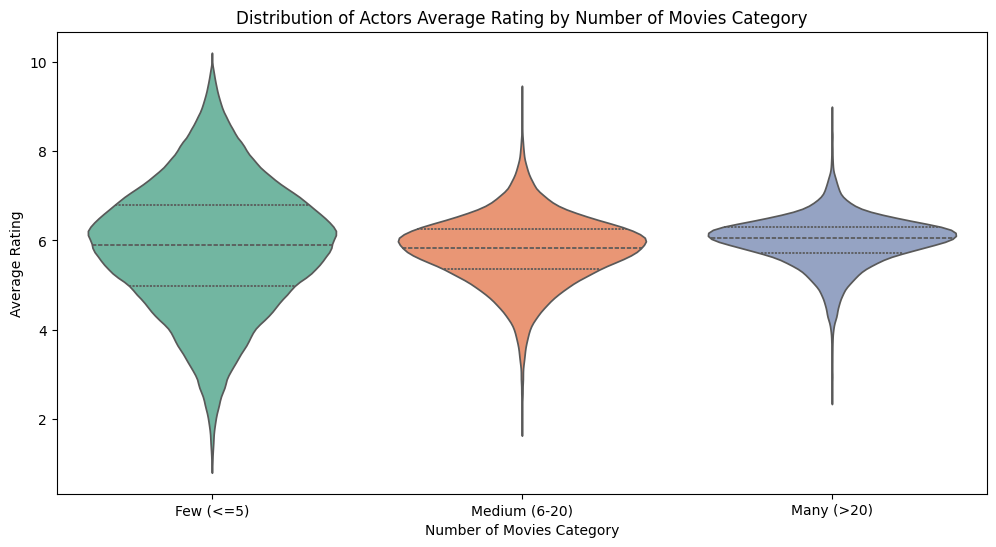

In [ ]:


# Create bins for number of movies: few (<=5), medium (6-20), many (>20)
actors_rating_hanna_df['num_movies_category'] = pd.cut(
    actors_rating_hanna_df['num_movies'],
    bins=[-1, 5, 20, 1000],
    labels=['Few (<=5)', 'Medium (6-20)', 'Many (>20)']
)

plt.figure(figsize=(12,6))
sns.violinplot(
    x='num_movies_category',
    y='average_rating',
    data=actors_rating_hanna_df,
    inner='quartile',
    palette='Set2'
)
plt.title('Distribution of Actors Average Rating by Number of Movies Category')
plt.xlabel('Number of Movies Category')
plt.ylabel('Average Rating')
plt.show()


### ŸÉŸäŸÅ Ÿäÿ™Ÿàÿ≤ÿπ ÿπÿØÿØ ÿßŸÑÿ£ŸÅŸÑÿßŸÖ ÿßŸÑÿ™Ÿä ÿ¥ÿßÿ±ŸÉ ŸÅŸäŸáÿß ÿßŸÑŸÖŸÖÿ´ŸÑŸàŸÜ ÿå ŸàŸáŸÑ ŸáŸÜÿßŸÉ ÿπŸÑÿßŸÇÿ© ÿ®ŸäŸÜ ÿπÿØÿØ ÿßŸÑÿ£ŸÅŸÑÿßŸÖ ŸàŸÖÿ™Ÿàÿ≥ÿ∑ ÿßŸÑÿ™ŸÇŸäŸäŸÖÿü

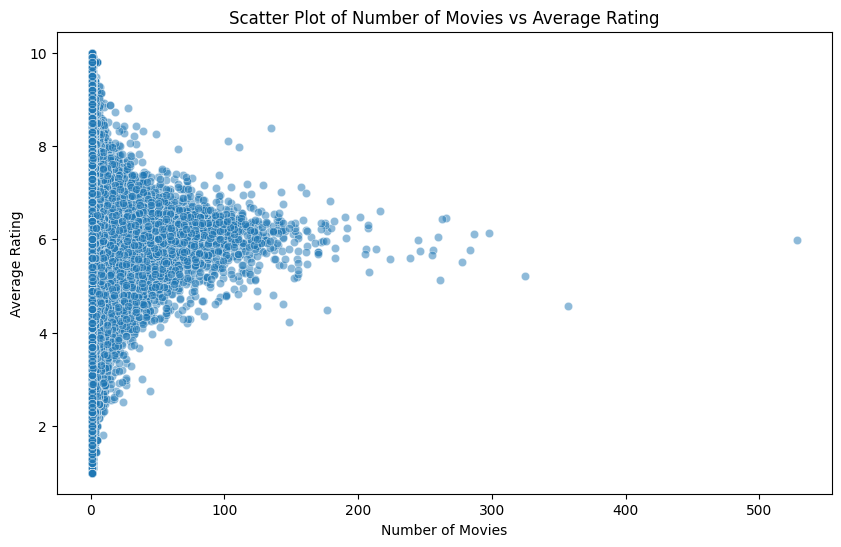

In [79]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='num_movies',
    y='average_rating',
    data=actors_rating_hanna_df,
    alpha=0.5
)
plt.title('Scatter Plot of Number of Movies vs Average Rating')
plt.xlabel('Number of Movies')
plt.ylabel('Average Rating')
plt.show()


### ŸáŸÑ ŸäŸàÿ¨ÿØ ÿ™ÿ®ÿßŸäŸÜ ŸÉÿ®Ÿäÿ± ÿ®ŸäŸÜ ŸÖÿ™Ÿàÿ≥ÿ∑ ÿ™ŸÇŸäŸäŸÖ ÿßŸÑŸÖŸÖÿ´ŸÑŸäŸÜ  ŸàÿßŸÑÿ™ŸÇŸäŸäŸÖ ÿßŸÑÿ®Ÿäÿ≤Ÿä ÿü ŸÉŸäŸÅ Ÿäÿ∏Ÿáÿ± ÿßŸÑŸÅÿ±ŸÇ ÿ®ŸäŸÜŸáŸÖÿßÿü

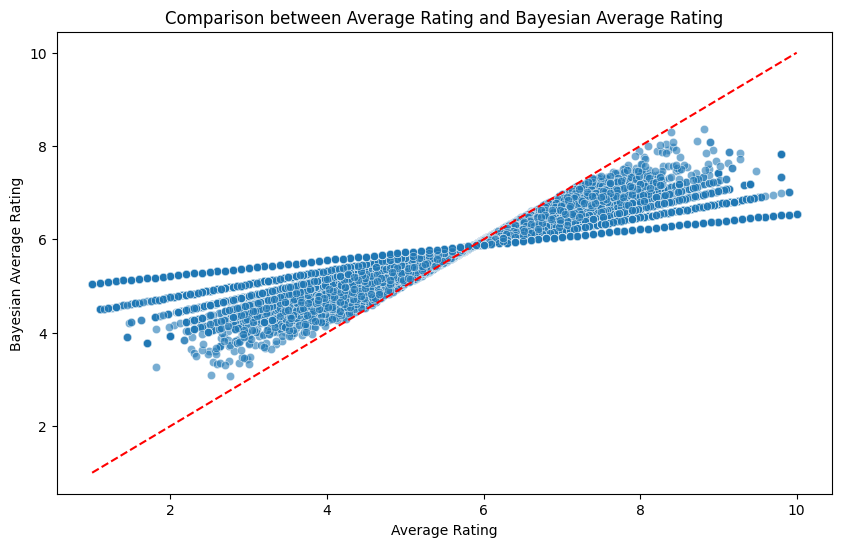

In [80]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='average_rating',
    y='bayesian_avg_rating',
    data=actors_rating_hanna_df,
    alpha=0.6
)
plt.plot([actors_rating_hanna_df['average_rating'].min(), actors_rating_hanna_df['average_rating'].max()],
         [actors_rating_hanna_df['average_rating'].min(), actors_rating_hanna_df['average_rating'].max()],
         'r--')  # 45 degree line for reference
plt.title('Comparison between Average Rating and Bayesian Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Bayesian Average Rating')
plt.show()


### ŸÖÿß ŸáŸà ÿßŸÑÿ™Ÿàÿ≤Ÿäÿπ ÿßŸÑÿπÿßŸÖ ŸÑÿ£ÿπŸÑŸâ ÿ™ŸÇŸäŸäŸÖÿßÿ™ ÿßŸÑÿ£ŸÅŸÑÿßŸÖ ÿßŸÑÿ™Ÿä ÿ¥ÿßÿ±ŸÉ ŸÅŸäŸáÿß ÿßŸÑŸÖŸÖÿ´ŸÑ ÿü ŸàŸáŸÑ ŸáŸÜÿßŸÉ ÿπŸÑÿßŸÇÿ© ÿ®ŸäŸÜ ÿ™ŸÇŸäŸäŸÖ ÿ£ŸÅÿ∂ŸÑ ŸÅŸäŸÑŸÖ ŸàÿπÿØÿØ ÿßŸÑÿ£ŸÅŸÑÿßŸÖ ÿßŸÑÿ™Ÿä ÿ¥ÿßÿ±ŸÉ ŸÅŸäŸáÿß ÿßŸÑŸÖŸÖÿ´ŸÑÿü

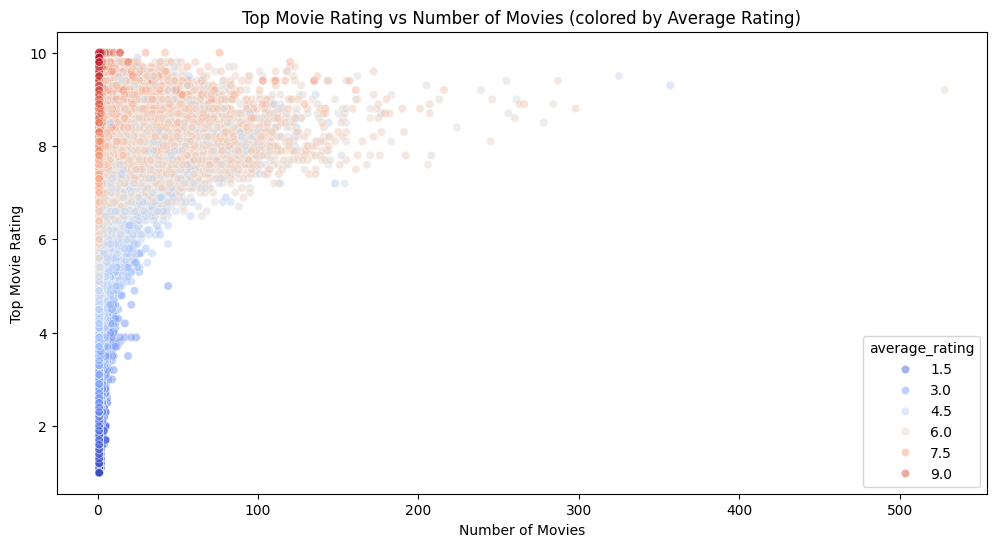

In [81]:
plt.figure(figsize=(12,6))
sns.scatterplot(
    x='num_movies',
    y='top_movie_rating',
    data=actors_rating_hanna_df,
    alpha=0.5,
    hue='average_rating',
    palette='coolwarm'
)
plt.title('Top Movie Rating vs Number of Movies (colored by Average Rating)')
plt.xlabel('Number of Movies')
plt.ylabel('Top Movie Rating')
# plt.colorbar(label='Average Rating')
plt.show()


### ŸáŸÑ ŸáŸÜÿßŸÉ ÿπŸÑÿßŸÇÿ© ÿ®ŸäŸÜ ÿ™ŸÇŸäŸäŸÖÿßÿ™ ÿßŸÑŸÖŸÖÿ´ŸÑŸäŸÜ ŸàŸÖŸäÿ≤ÿßÿ™ ÿßŸÑÿ£Ÿàÿ≥ŸÉÿßÿ±ÿü



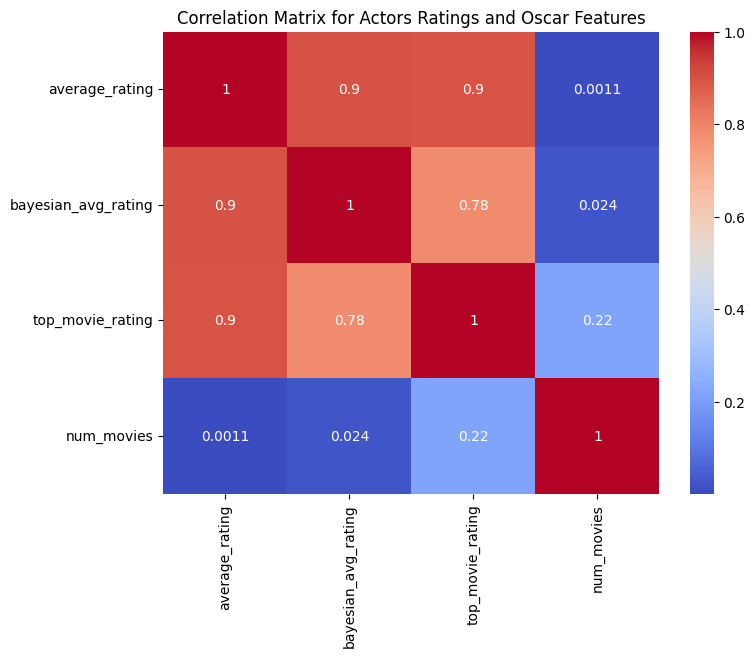

In [ ]:

# Calculate correlation matrix with Oscar-related features and actors ratings
corr_df = actors_rating_hanna_df[['average_rating', 'bayesian_avg_rating', 'top_movie_rating', 'num_movies']].copy()

# If you have a column for Oscar wins/nominations per actor, add it here. For now, let's assume 'actors_oscar_status' exists
# corr_df['actors_oscar_status'] = actors_oscar_status_series

corr = corr_df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Actors Ratings and Oscar Features')
plt.show()


### ŸÖÿßŸáŸà ÿ™Ÿàÿ≤ÿπ ÿ™ŸÇŸäŸäŸÖ ÿßŸÑŸÖŸÖÿ´ŸÑŸäŸÜ ŸÅŸä ŸÉŸÑ ŸÖŸÜ ÿßŸÑŸÖŸÜŸáÿ¨Ÿäÿßÿ™ ÿßŸÑÿ´ŸÑÿßÿ´ ÿü Ÿà ŸÉŸäŸÅ ŸÜÿµŸÜŸÅ ÿßŸÑŸÅÿ±ŸÇ ÿü

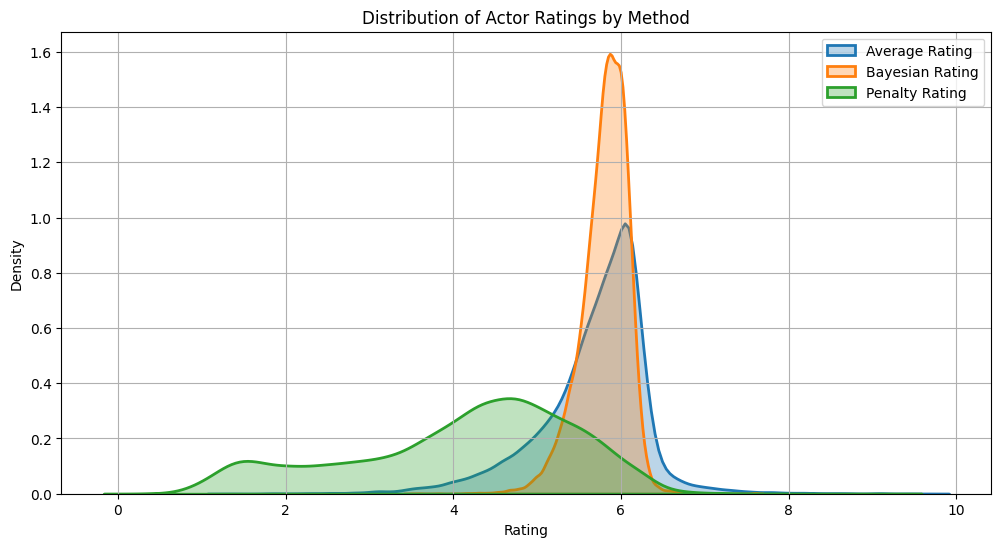

In [ ]:


plt.figure(figsize=(12, 6))

# Plot each rating method as density plot (or histogram if ÿ™ŸÅÿ∂ŸÑ)
sns.kdeplot(leen_movies_df['actors_avg_rating'], label='Average Rating', fill=True, alpha=0.3, linewidth=2)
sns.kdeplot(leen_movies_df['actors_bayesian_rating'], label='Bayesian Rating', fill=True, alpha=0.3, linewidth=2)
sns.kdeplot(leen_movies_df['actors_penalty_rating'], label='Penalty Rating', fill=True, alpha=0.3, linewidth=2)

plt.title('Distribution of Actor Ratings by Method')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


In [73]:
actors_rating_hanna_df['actor_normalized'] = actors_rating_hanna_df['actor'].str.lower().str.replace(r'\s+', '', regex=True)


# END